In [8]:
# package import

import os
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import itertools
import math
import sklearn as sk
import seaborn as sns

# set wd

os.chdir("\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project")
os.getcwd() # sets wd
#os.listdir(os.getcwd()) # lists files in wd


In [22]:
# import data
reddf = pd.read_csv("winequality-red.csv",delimiter=';')
whitedf = pd.read_csv("winequality-white.csv",delimiter=';')

# add color label
for z in list(reddf.index.values):
    reddf.at[z, 'color'] = str('red')
for z in list(whitedf.index.values):
    whitedf.at[z, 'color'] = str('white')
    
# stack df's 
fulldf = pd.concat([reddf, whitedf])
fulldf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
## exploratory statistics
## visualize the distributions of various properties

# set global preferences
%matplotlib inline
mpl.rcParams['figure.dpi']=250
colordict = {
    'red' : 'xkcd:wine',
    'white' : 'xkcd:goldenrod'
}

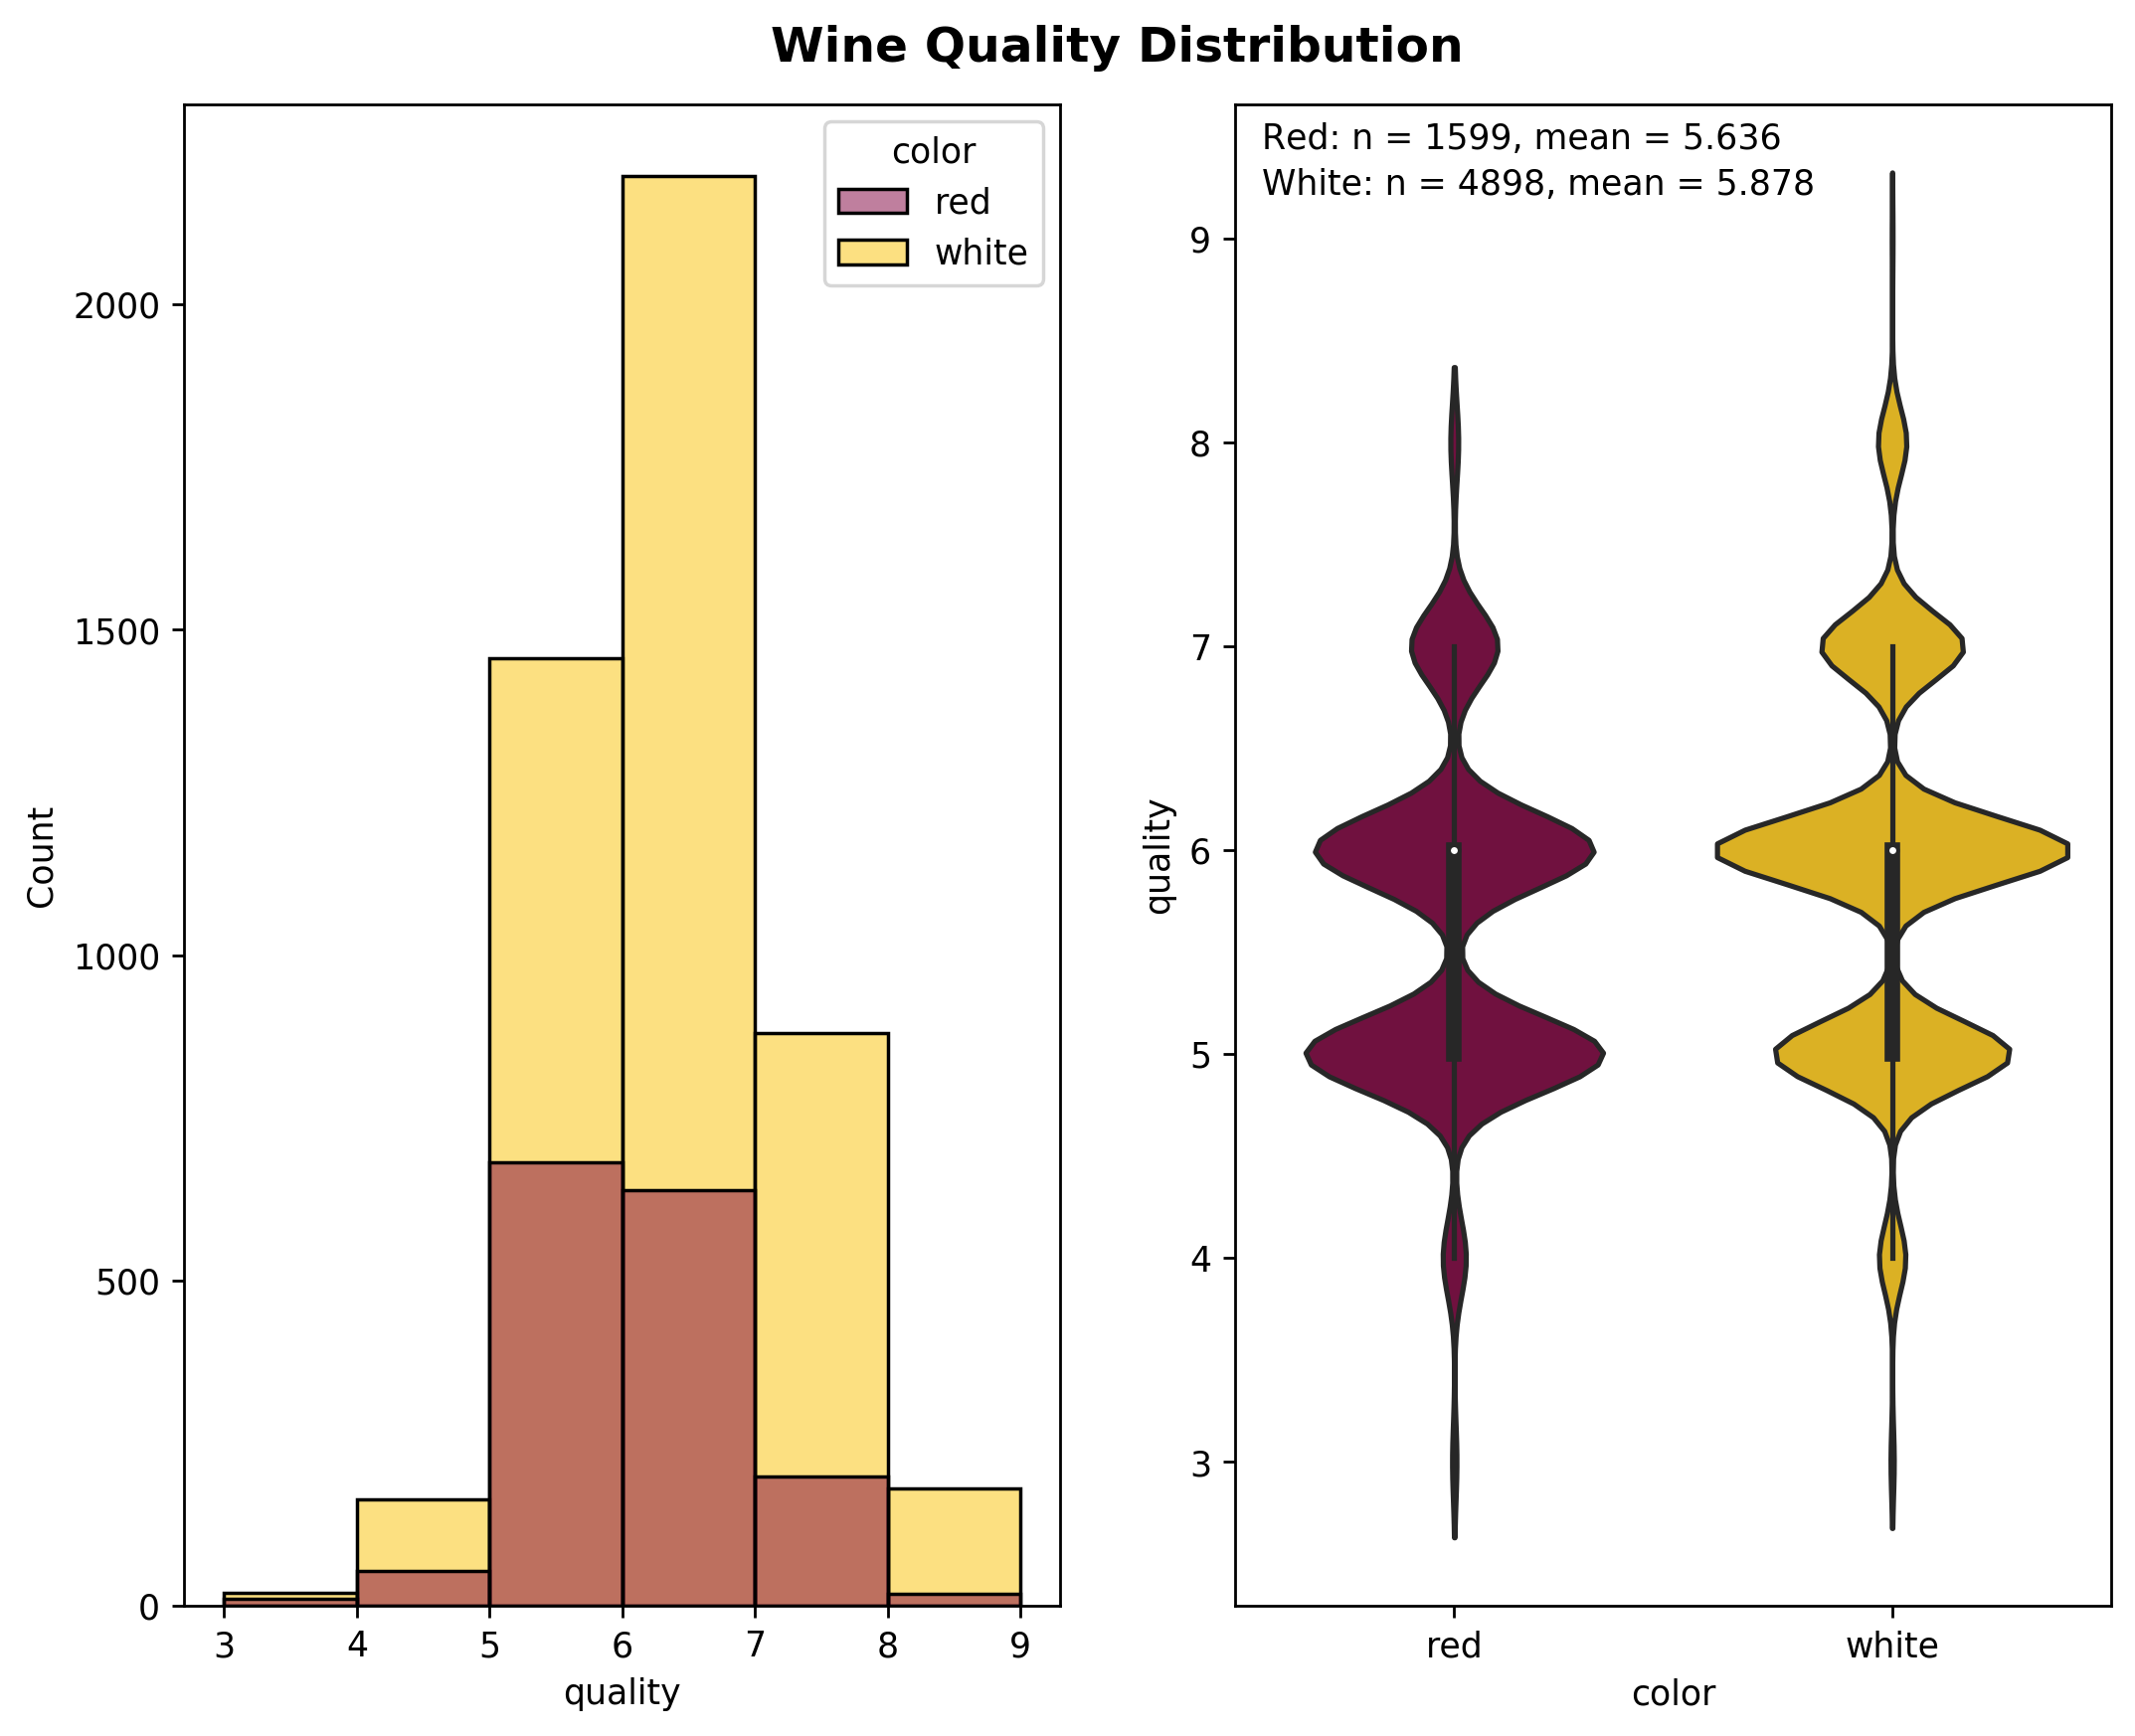

In [55]:
## 1. Quality ##
# given as a whole number 1-10

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Wine Quality Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="quality", 
             binwidth = 1,
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="quality",
           palette=colordict,
           #size = 1,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['quality'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['quality'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('quality_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('quality_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

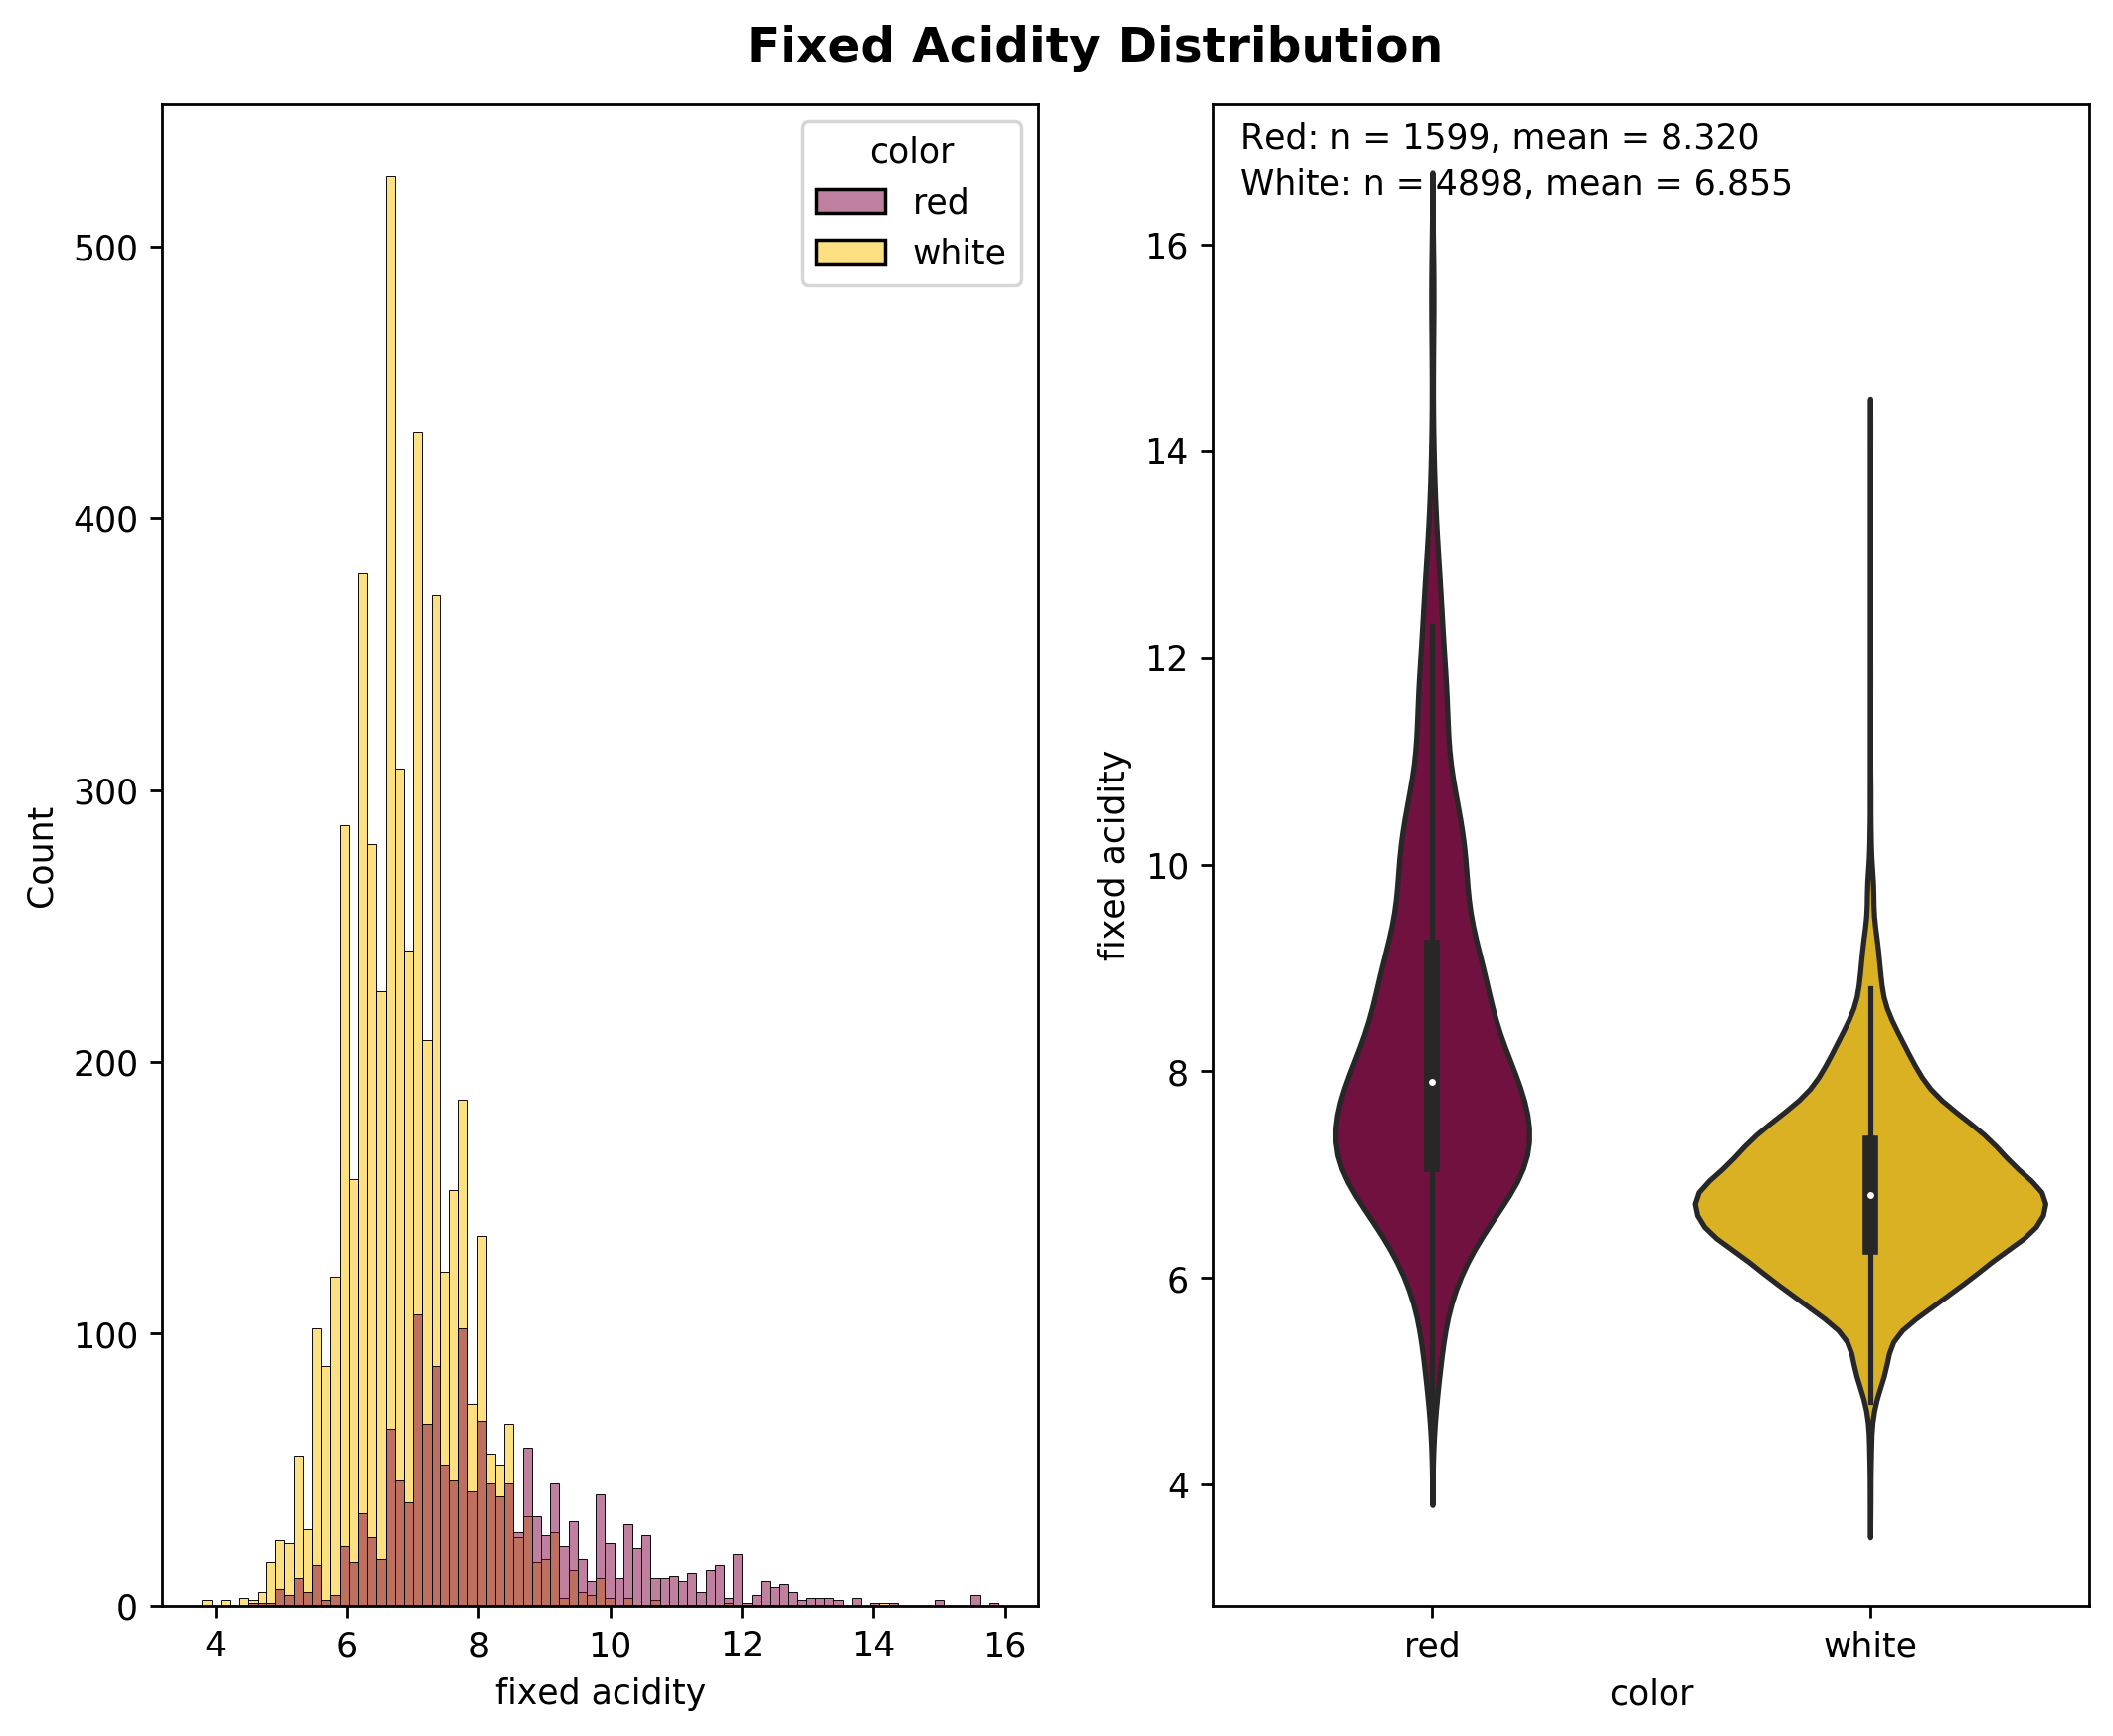

In [42]:
## 2. Fixed Acidity ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Fixed Acidity Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="fixed acidity", 
             #binwidth = 1,
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="fixed acidity",
           palette=colordict,
           #size = 1,
           ax=ax[1],
           )
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['fixed acidity'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['fixed acidity'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')
#plt.savefig('fixed_acidity_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('fixed_acidity_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

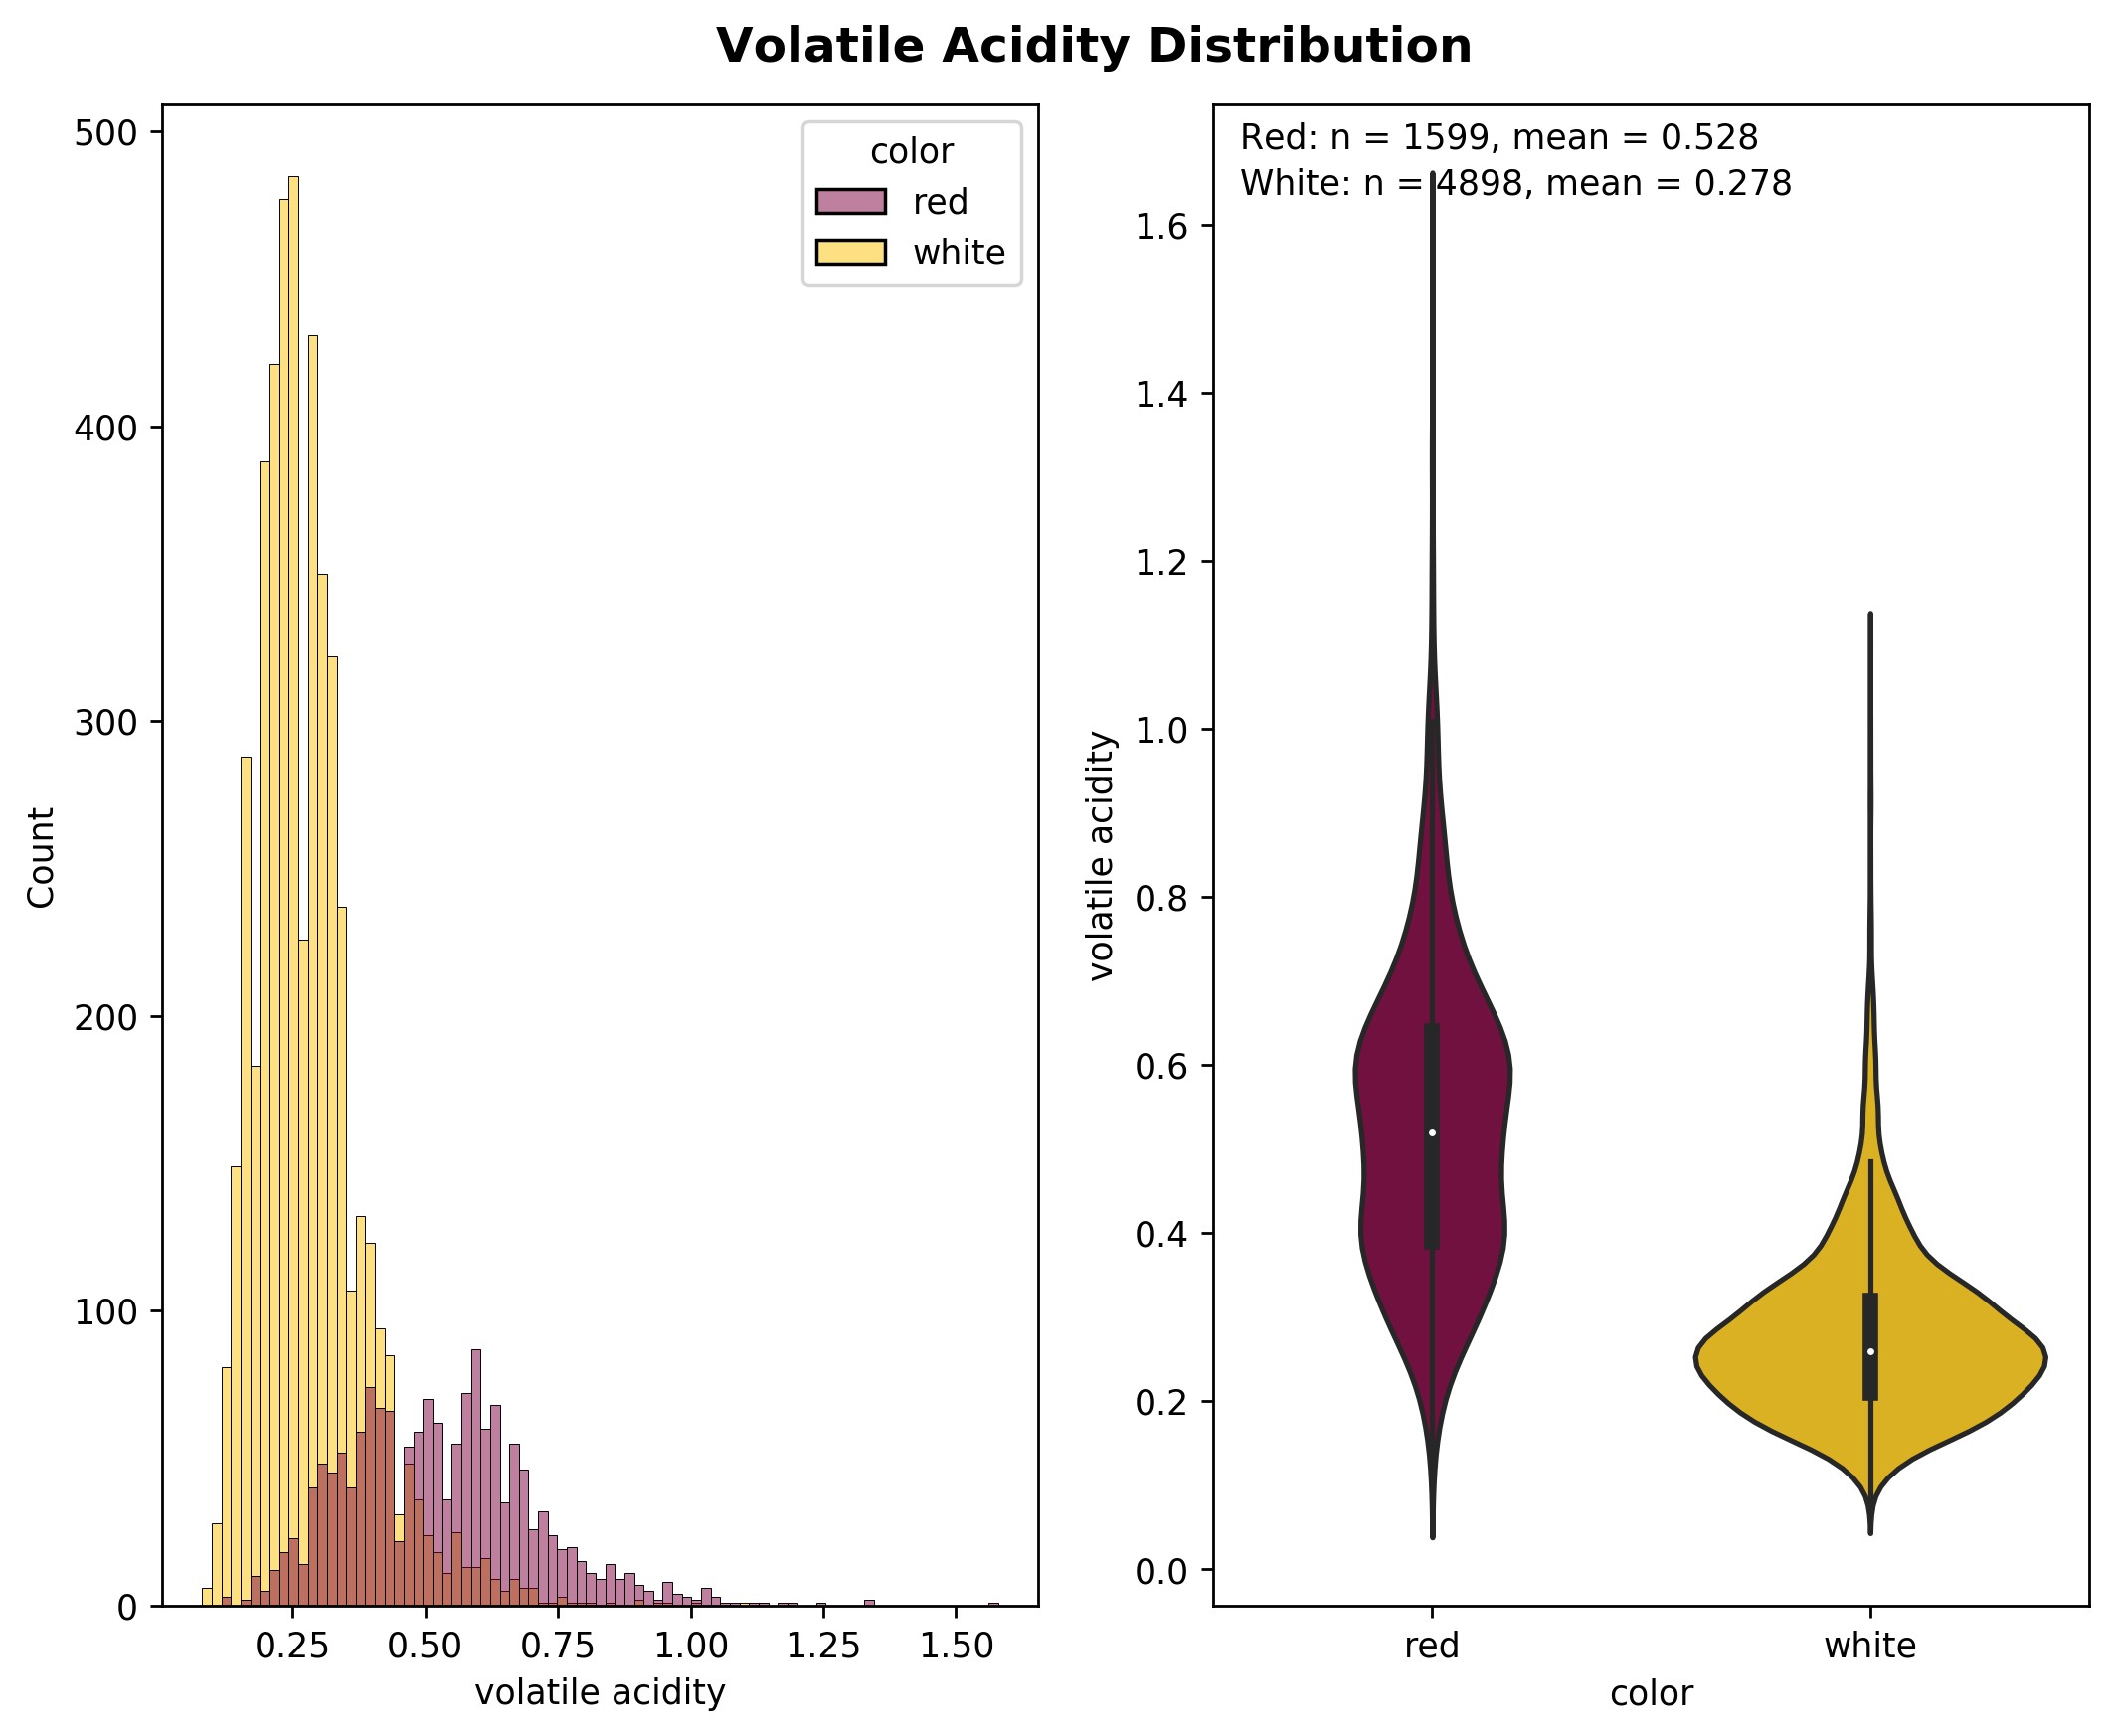

In [43]:
## 3. Volatile Acidity ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Volatile Acidity Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="volatile acidity", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="volatile acidity",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['volatile acidity'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['volatile acidity'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('volatile_acidity_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('volatile_acidity_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

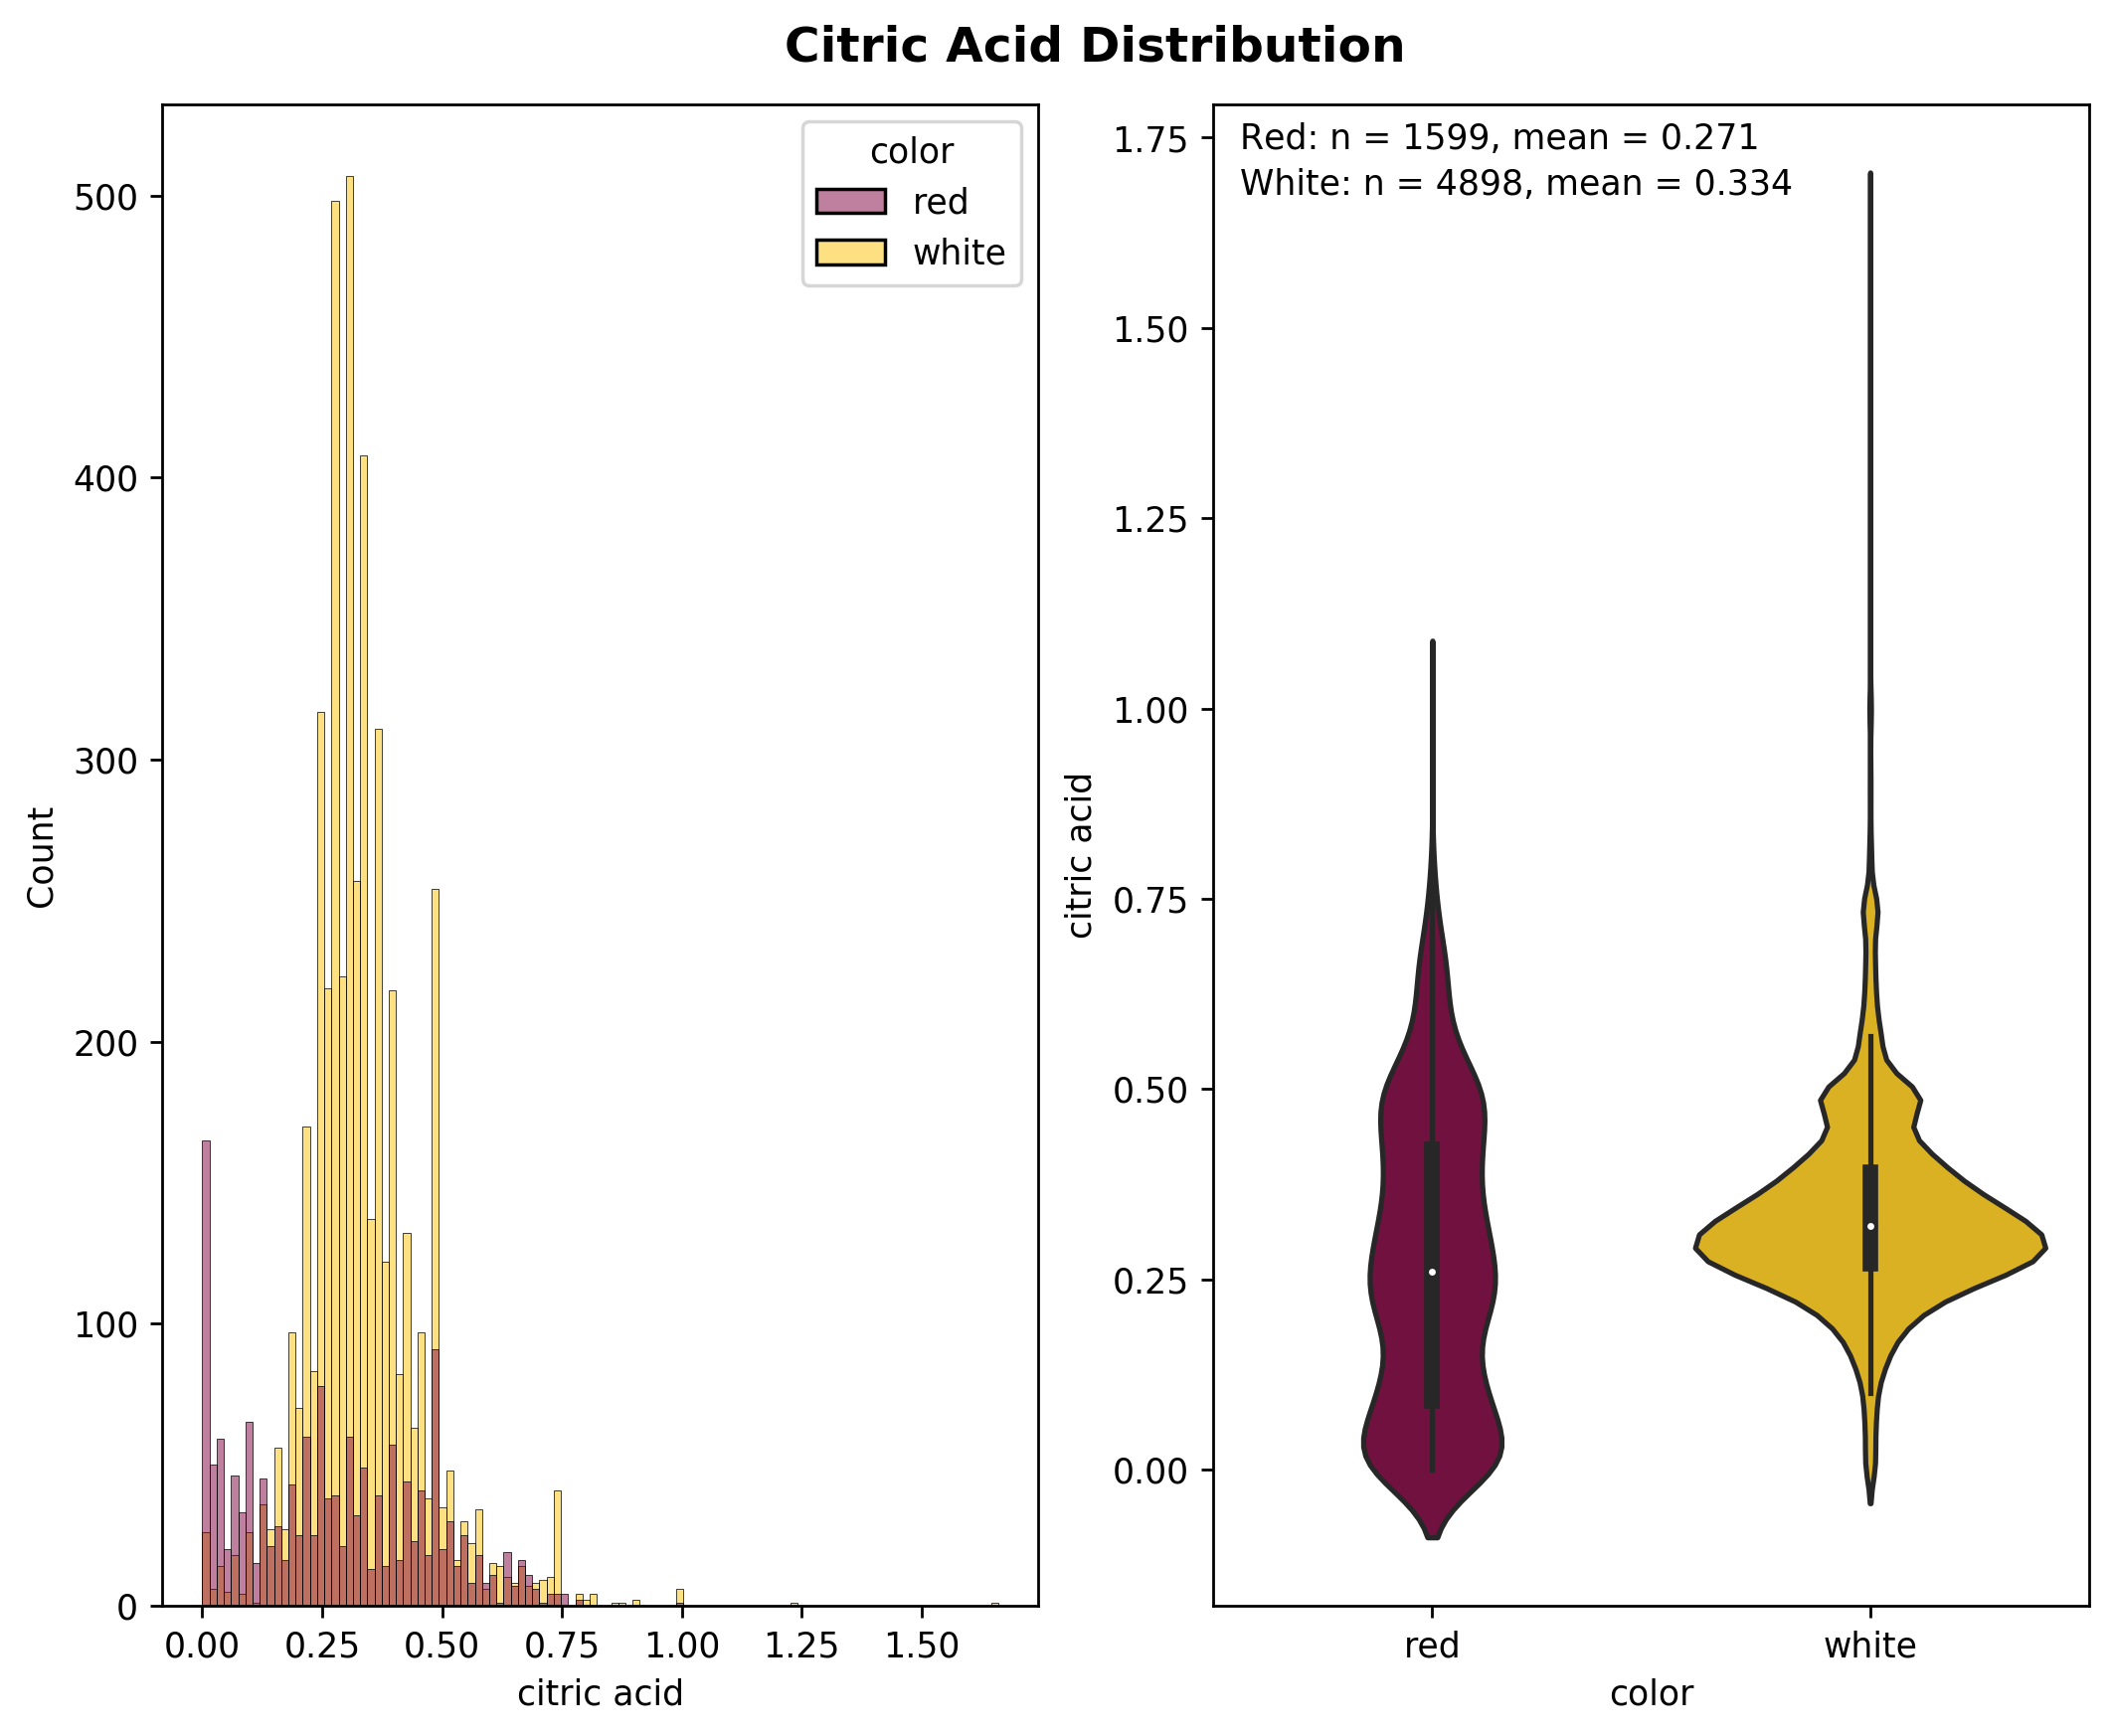

In [44]:
## 4. Citric Acid ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Citric Acid Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="citric acid", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="citric acid",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['citric acid'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['citric acid'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('citric_acid_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('citric_acid_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

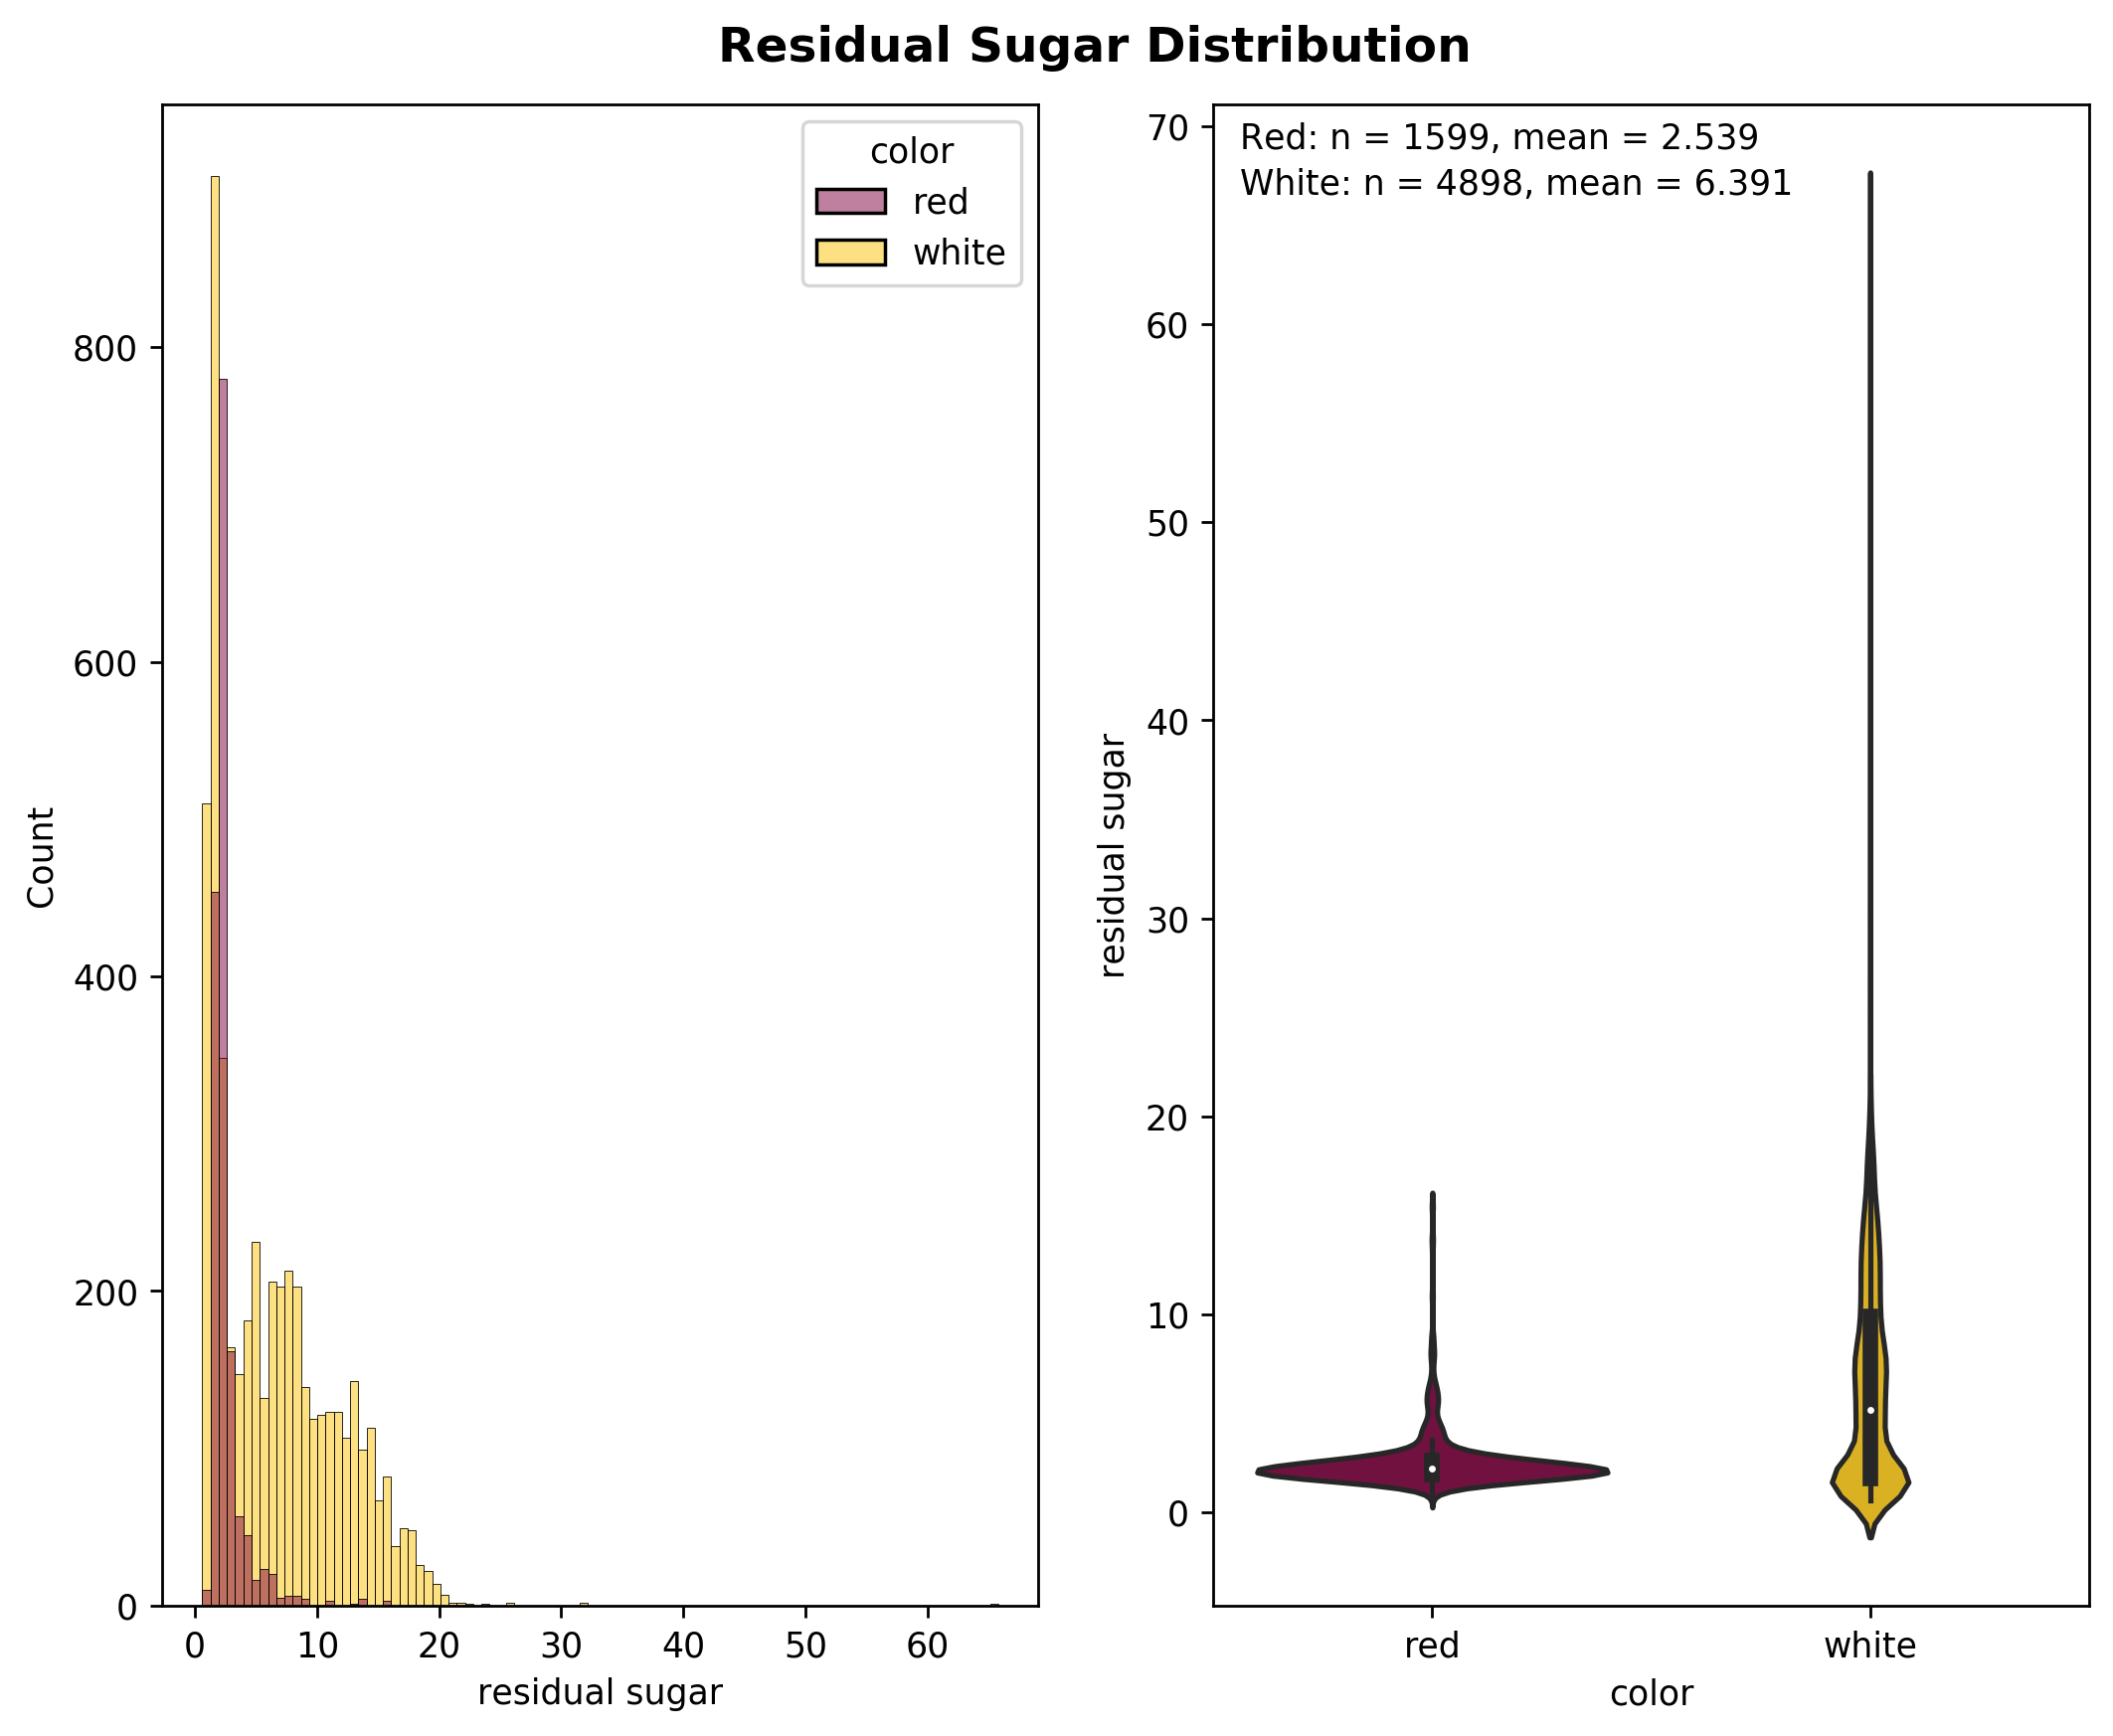

In [45]:
## 5. Residual Sugar ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Residual Sugar Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="residual sugar", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="residual sugar",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['residual sugar'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['residual sugar'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('residual_sugar_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('residual_sugar_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

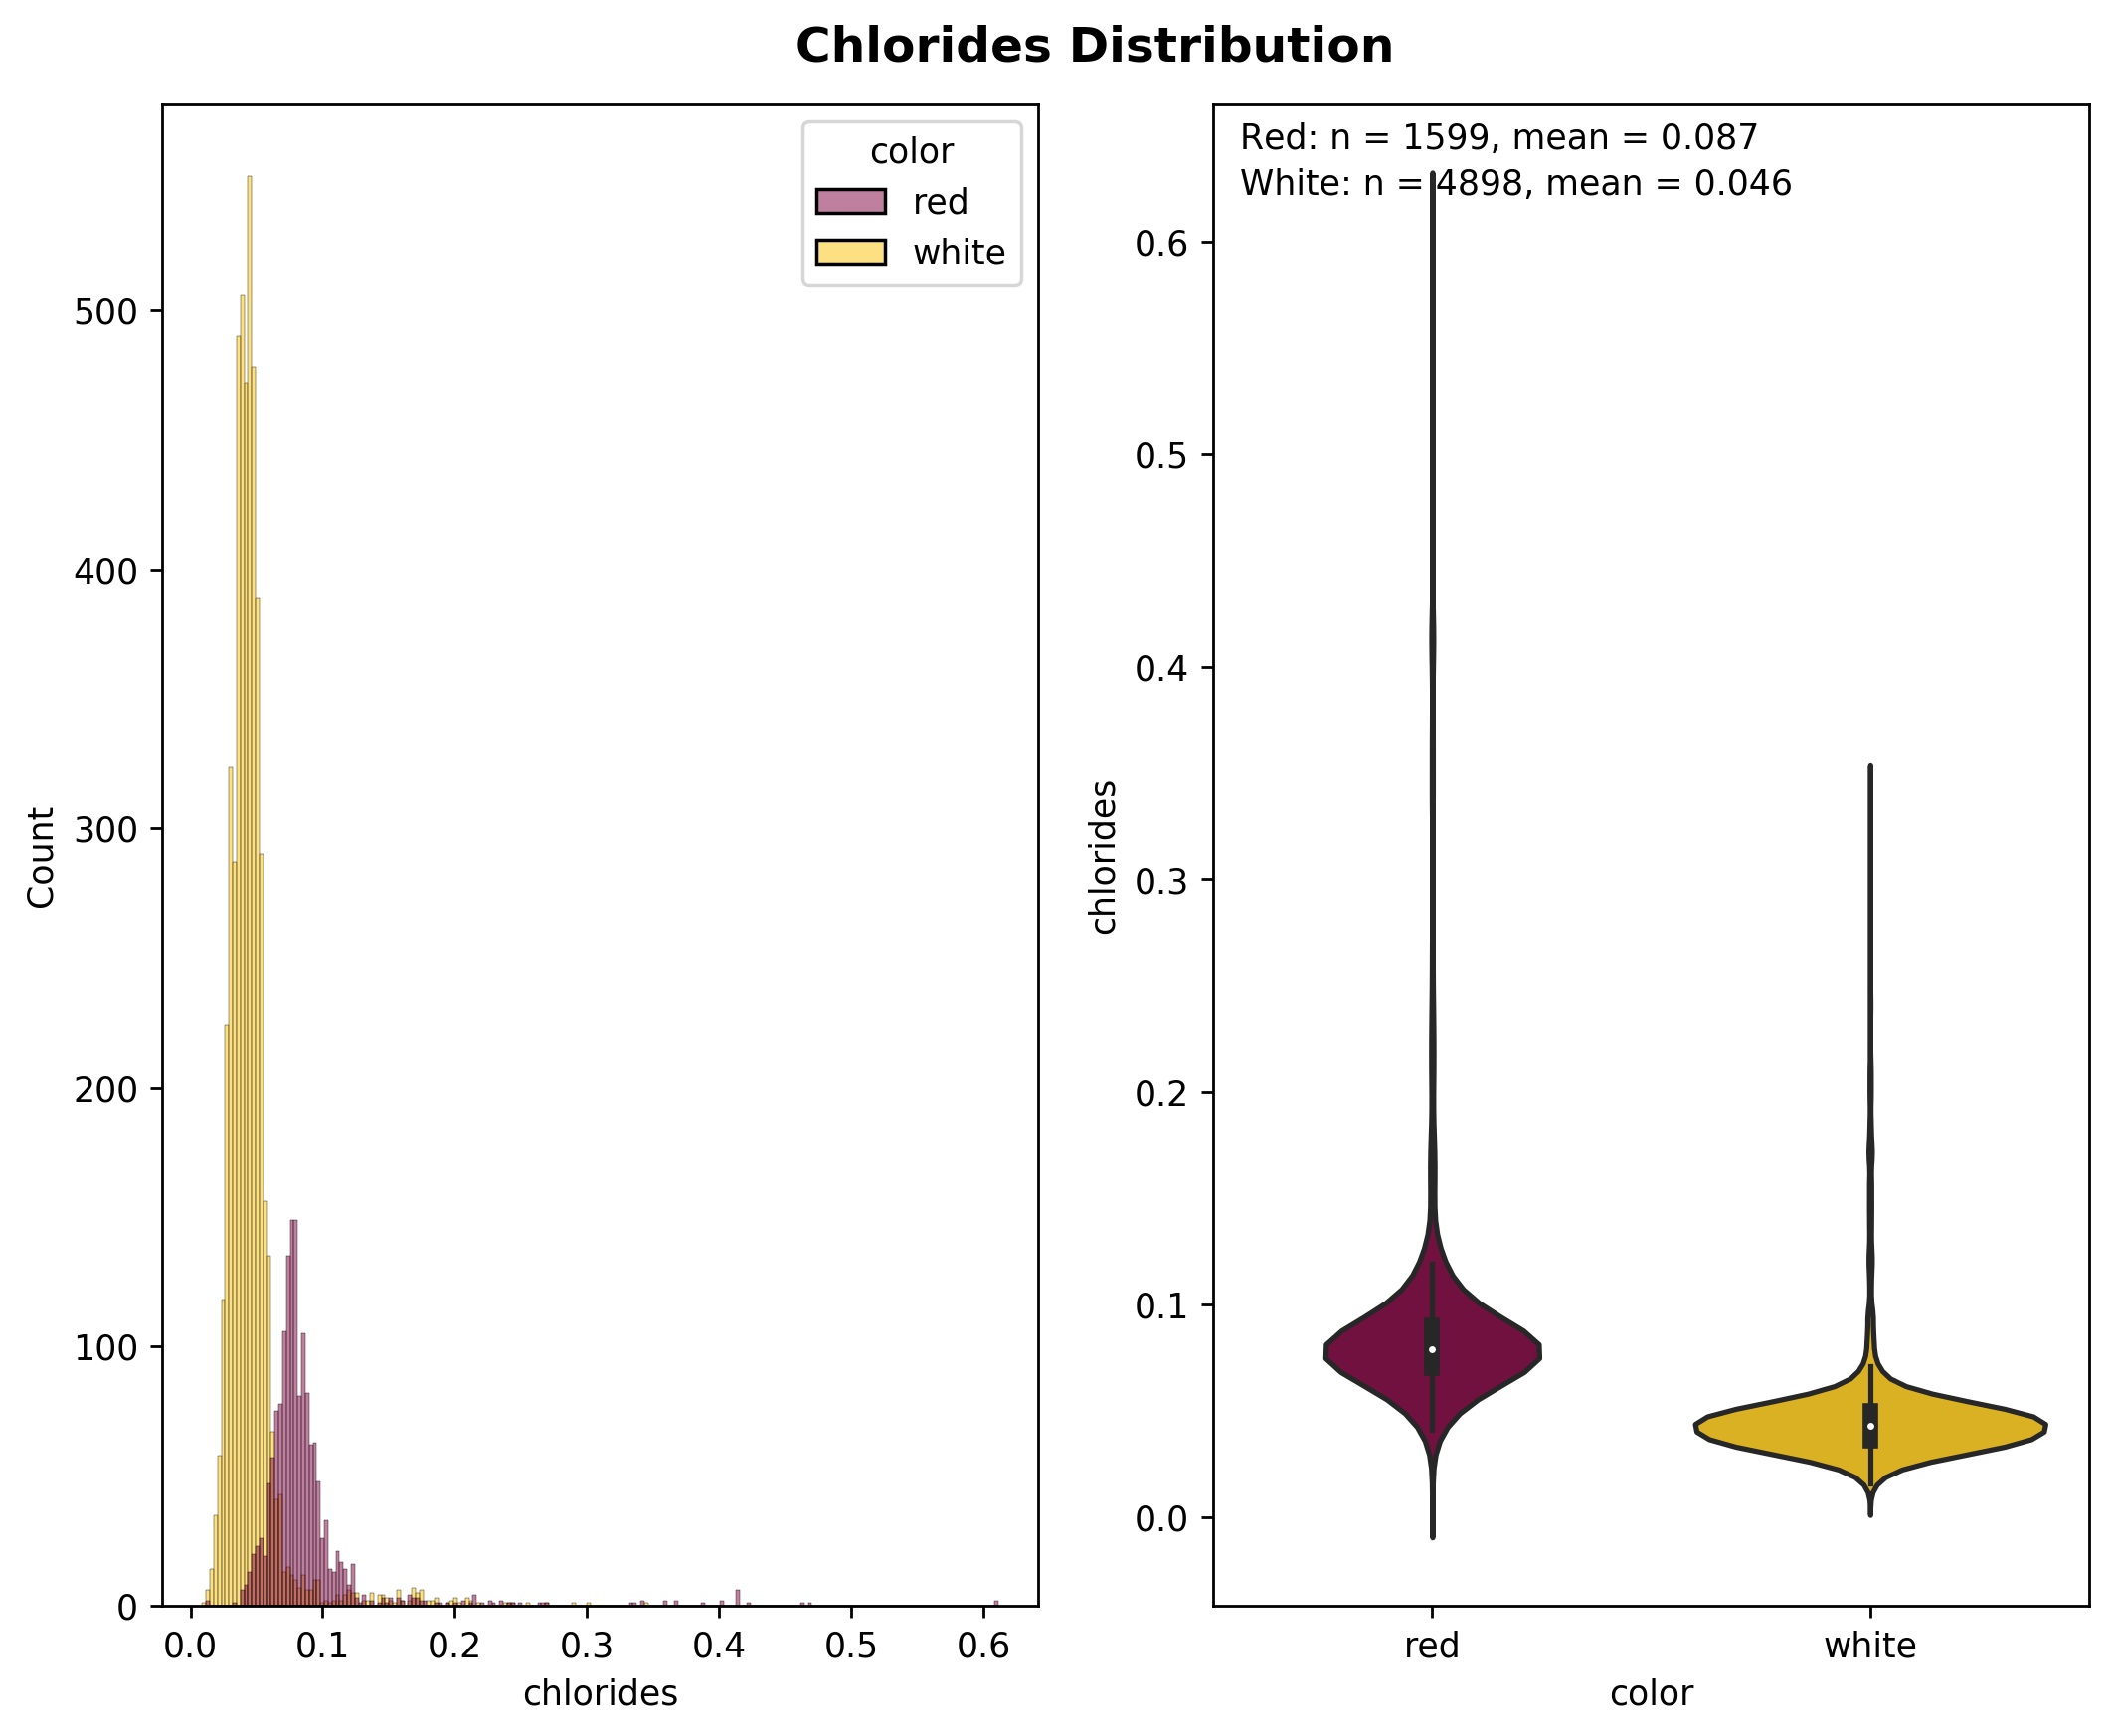

In [46]:
## 6. Chlorides ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Chlorides Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="chlorides", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="chlorides",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['chlorides'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['chlorides'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('chlorides_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('chlorides_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

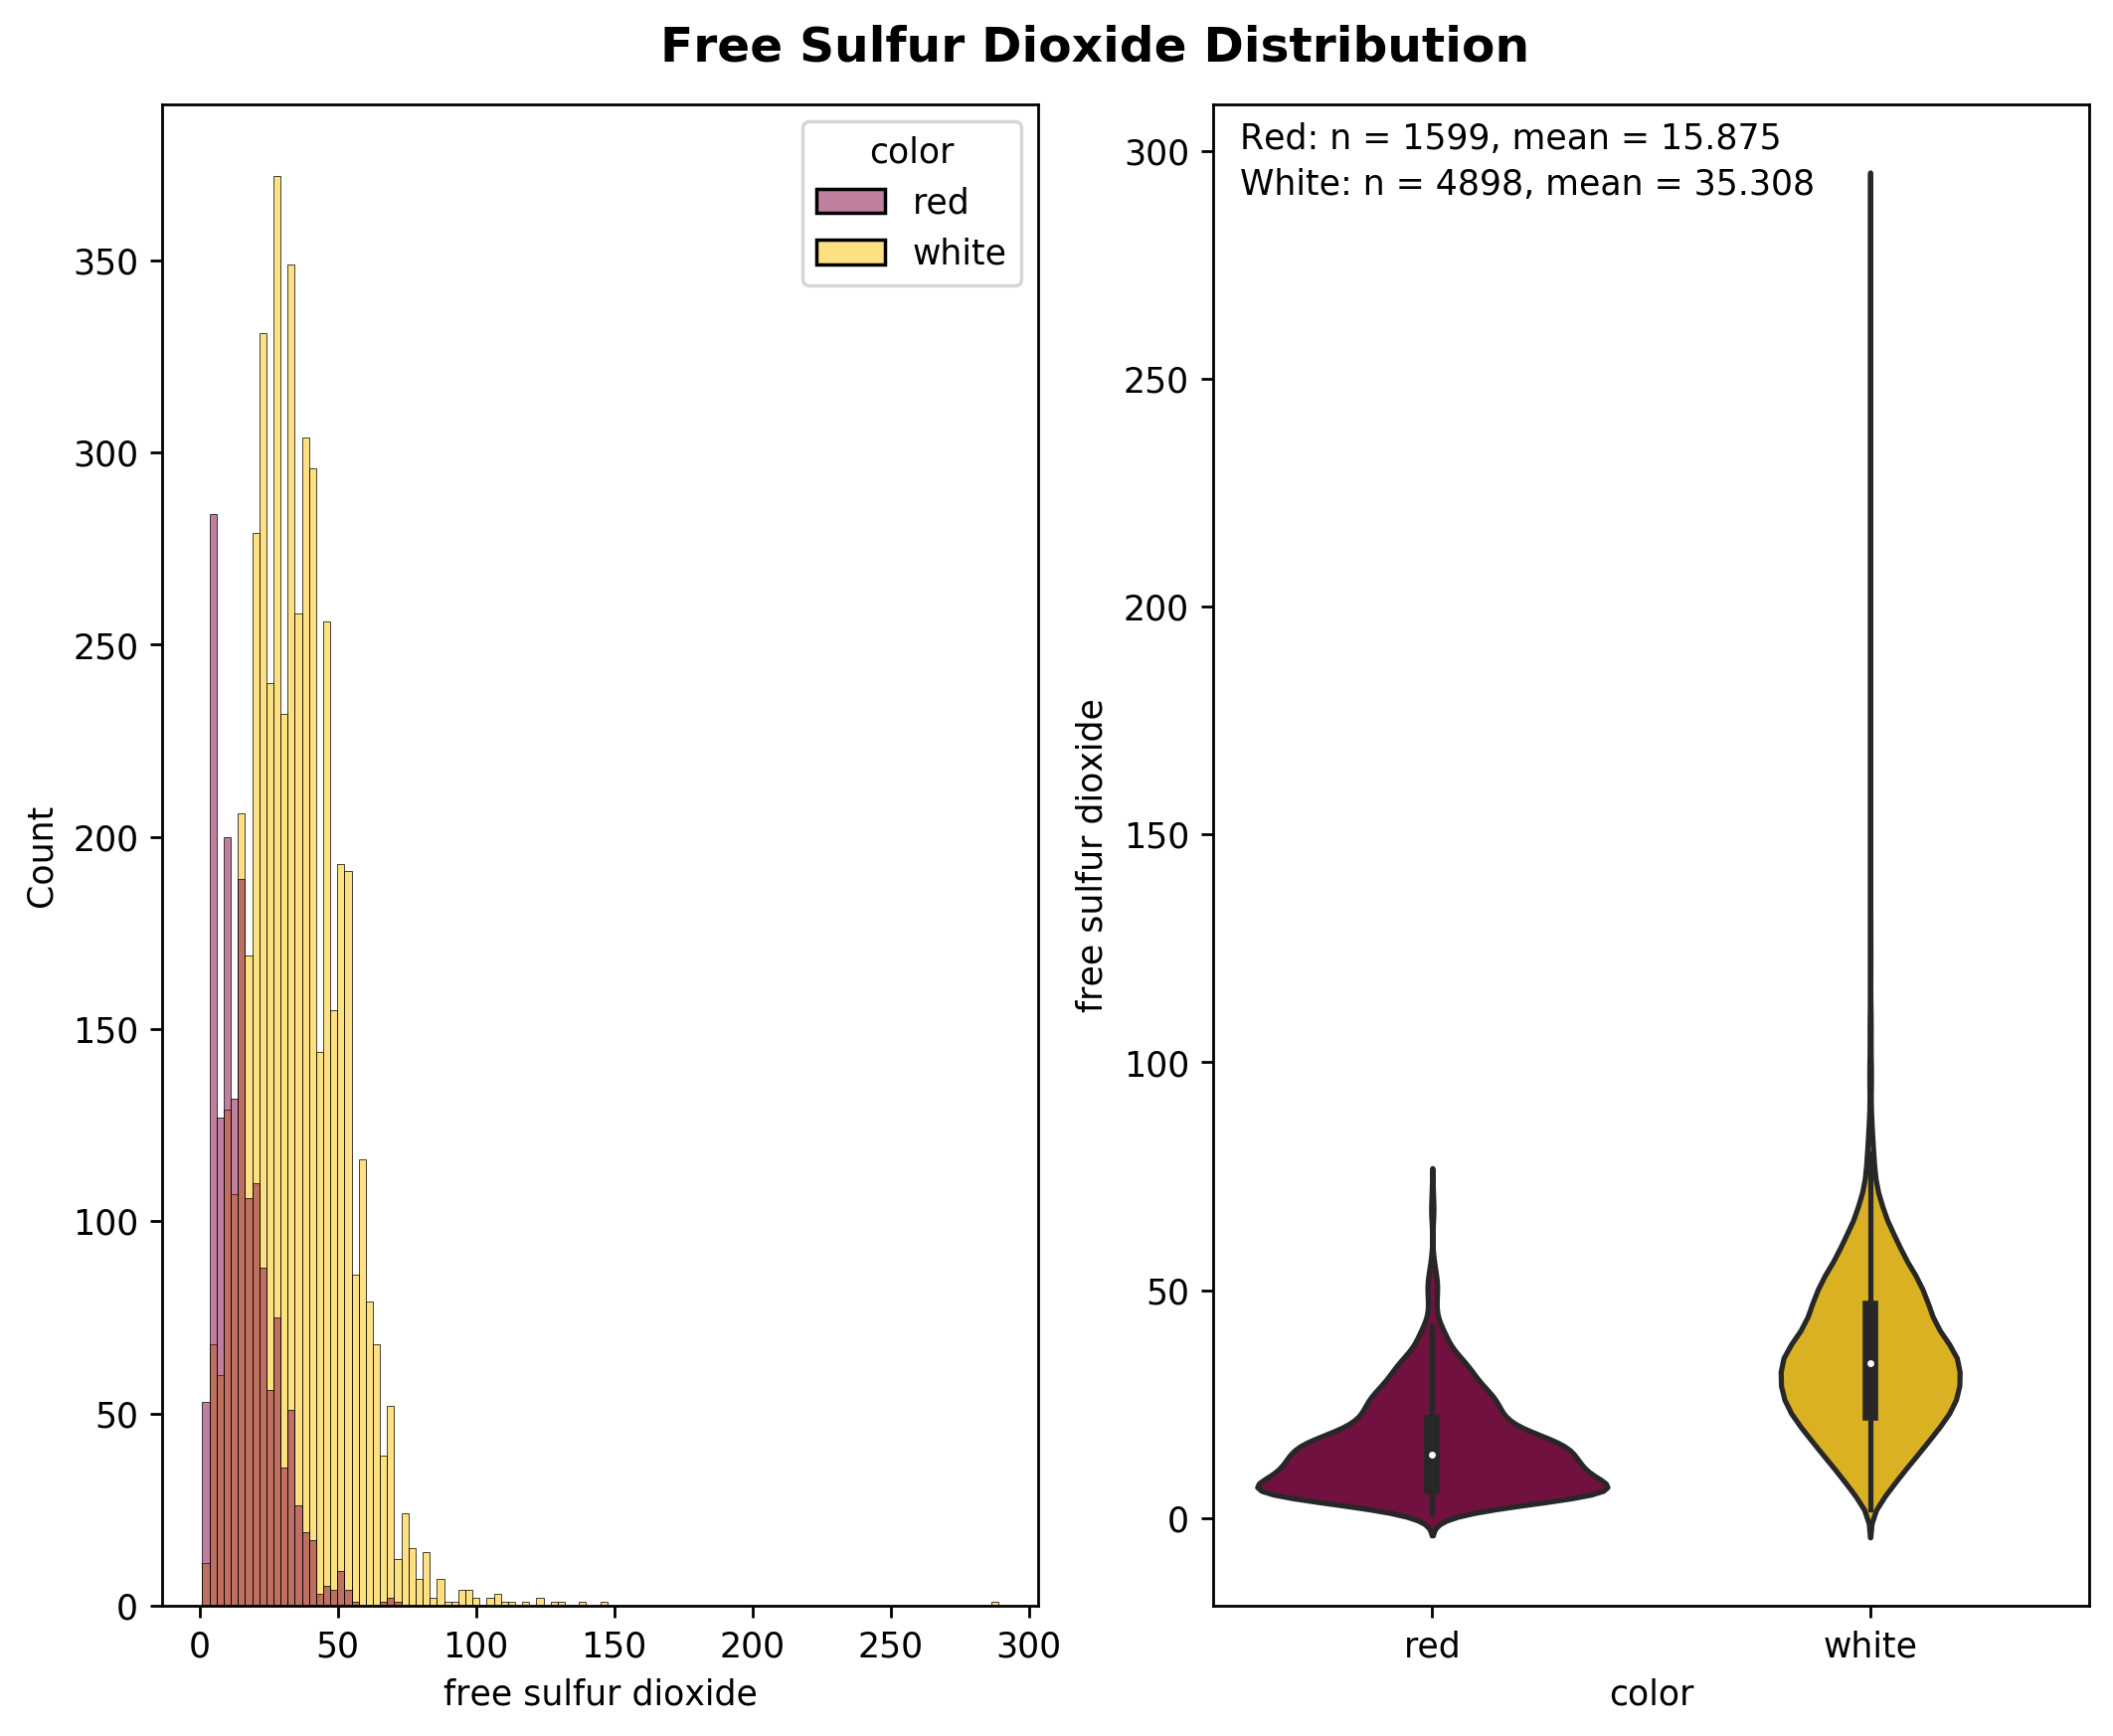

In [48]:
## 6. Free Sulfur Dioxide ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Free Sulfur Dioxide Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="free sulfur dioxide", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="free sulfur dioxide",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['free sulfur dioxide'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['free sulfur dioxide'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('free_sulfur_dioxide_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('free_sulfur_dioxide_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

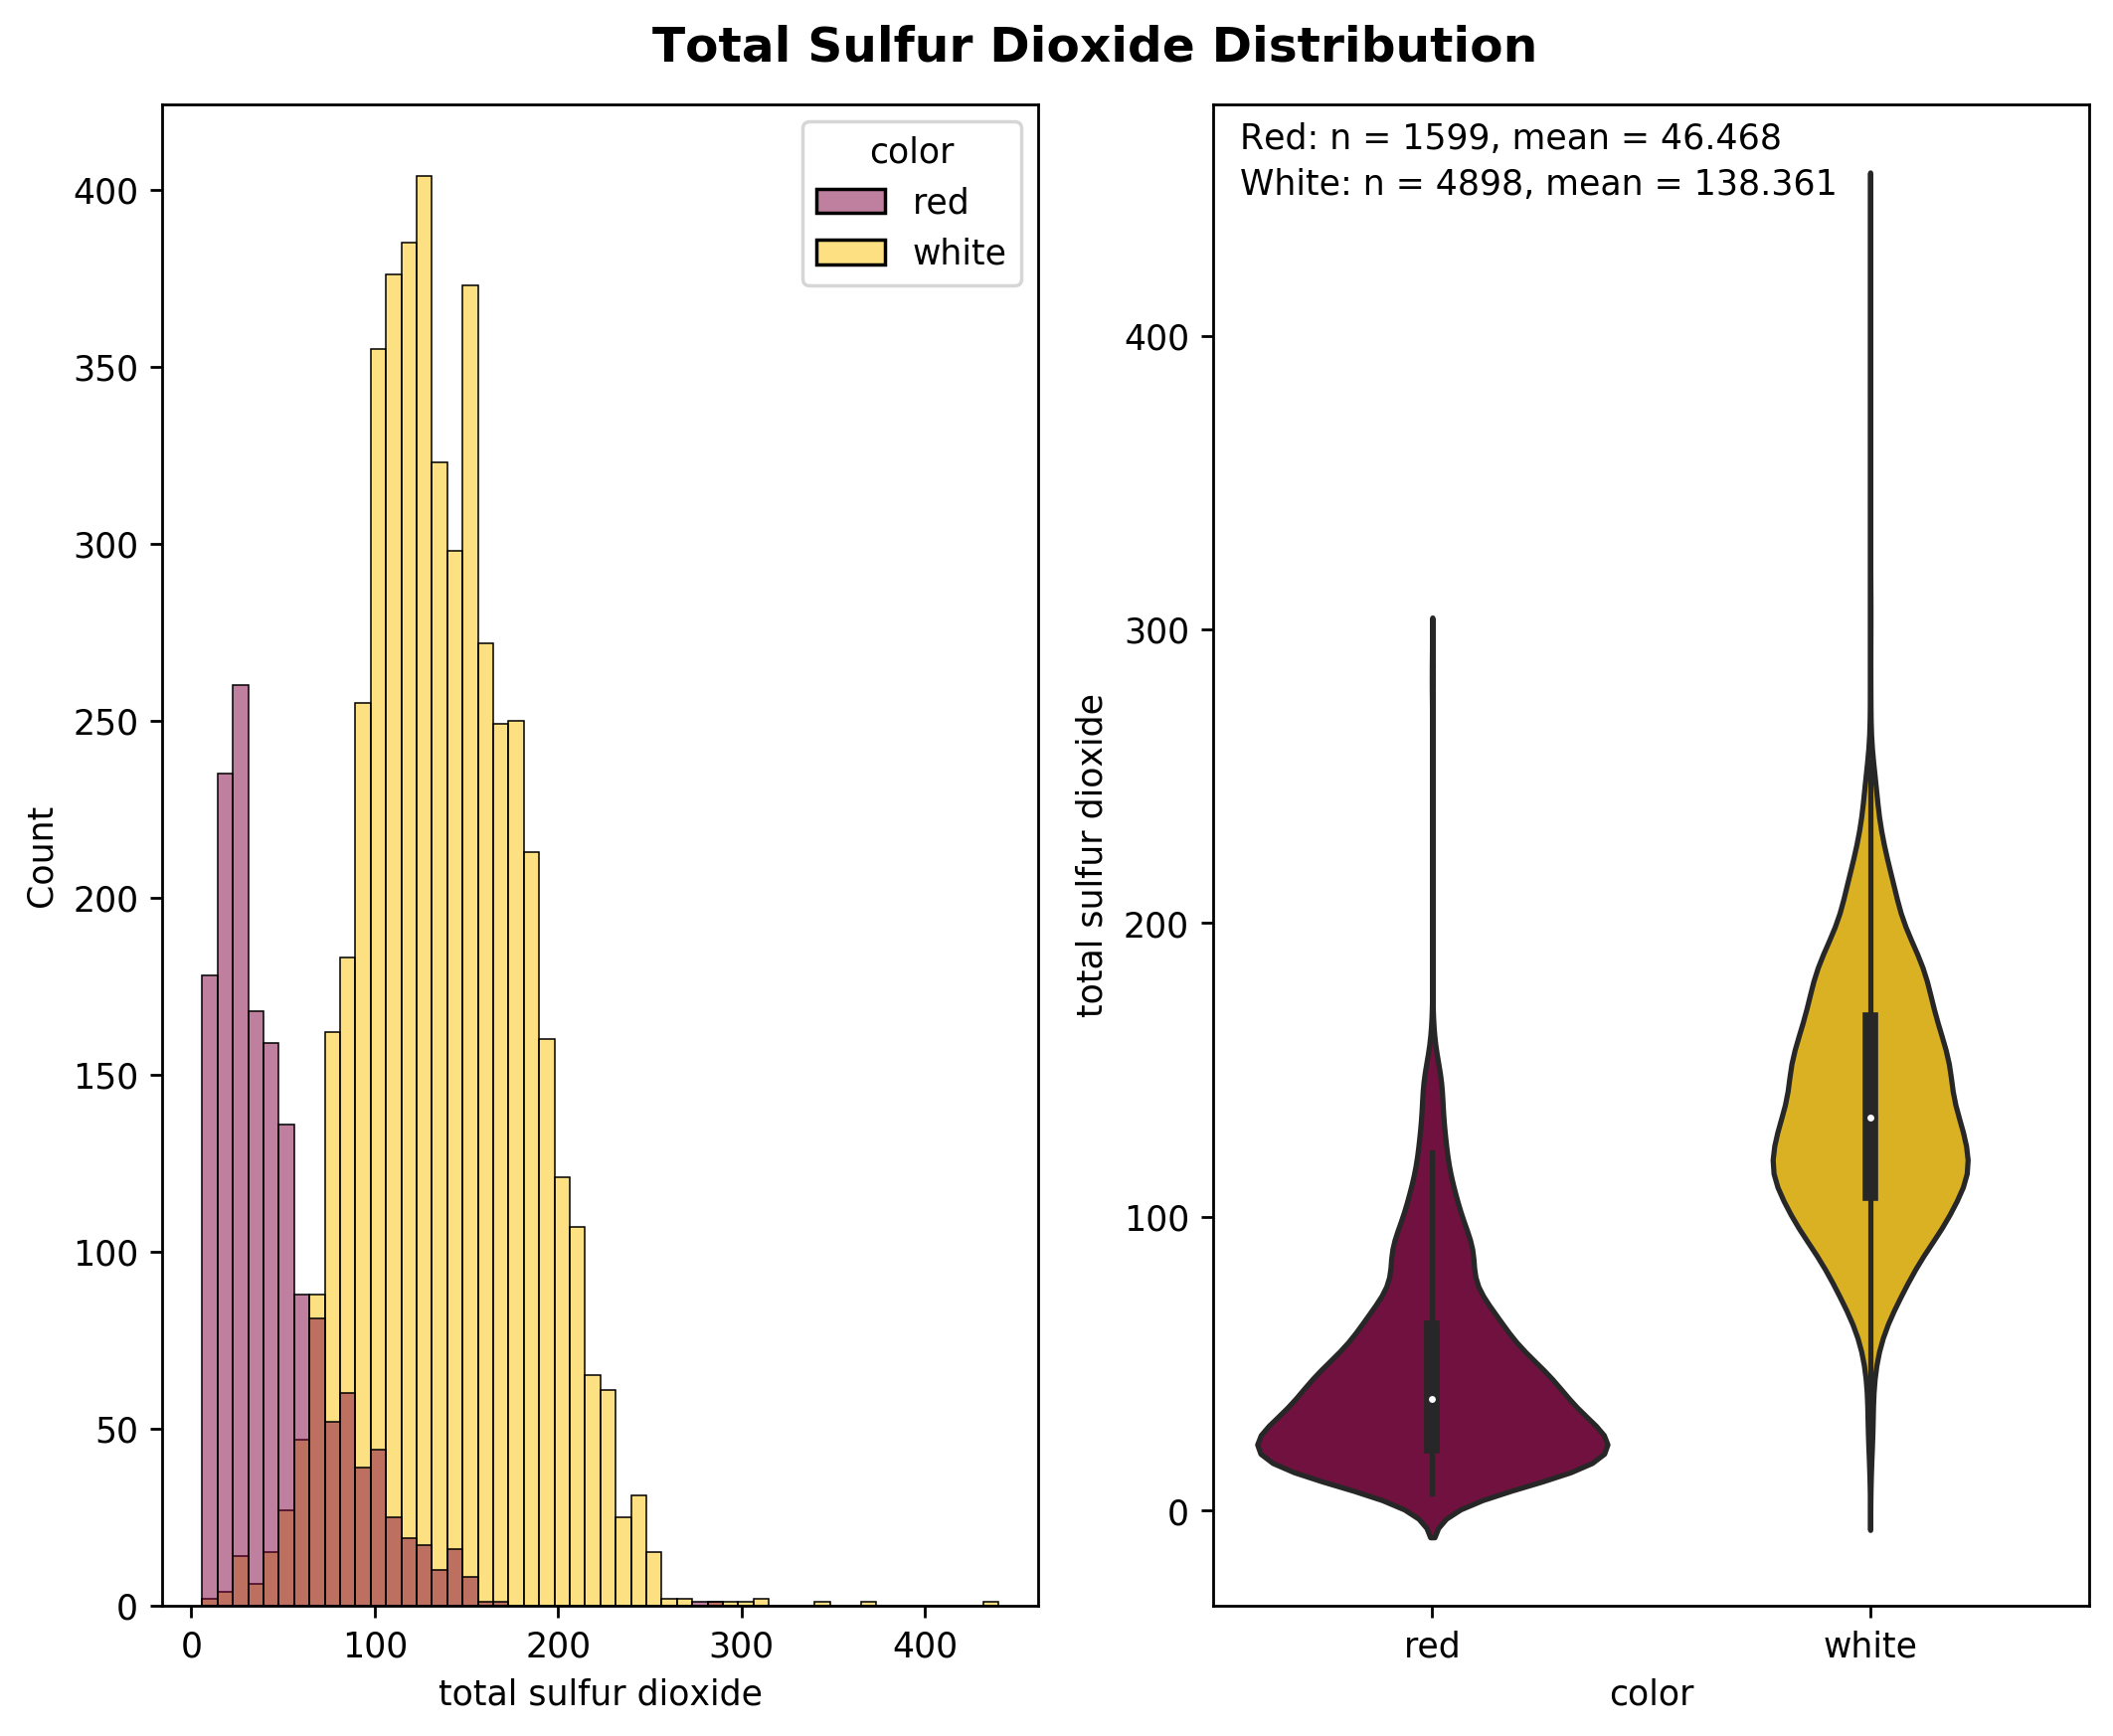

In [49]:
## 7. Total Sulfur Dioxide ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Total Sulfur Dioxide Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="total sulfur dioxide", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="total sulfur dioxide",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['total sulfur dioxide'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['total sulfur dioxide'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('total_sulfur_dioxide_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('total_sulfur_dioxide_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

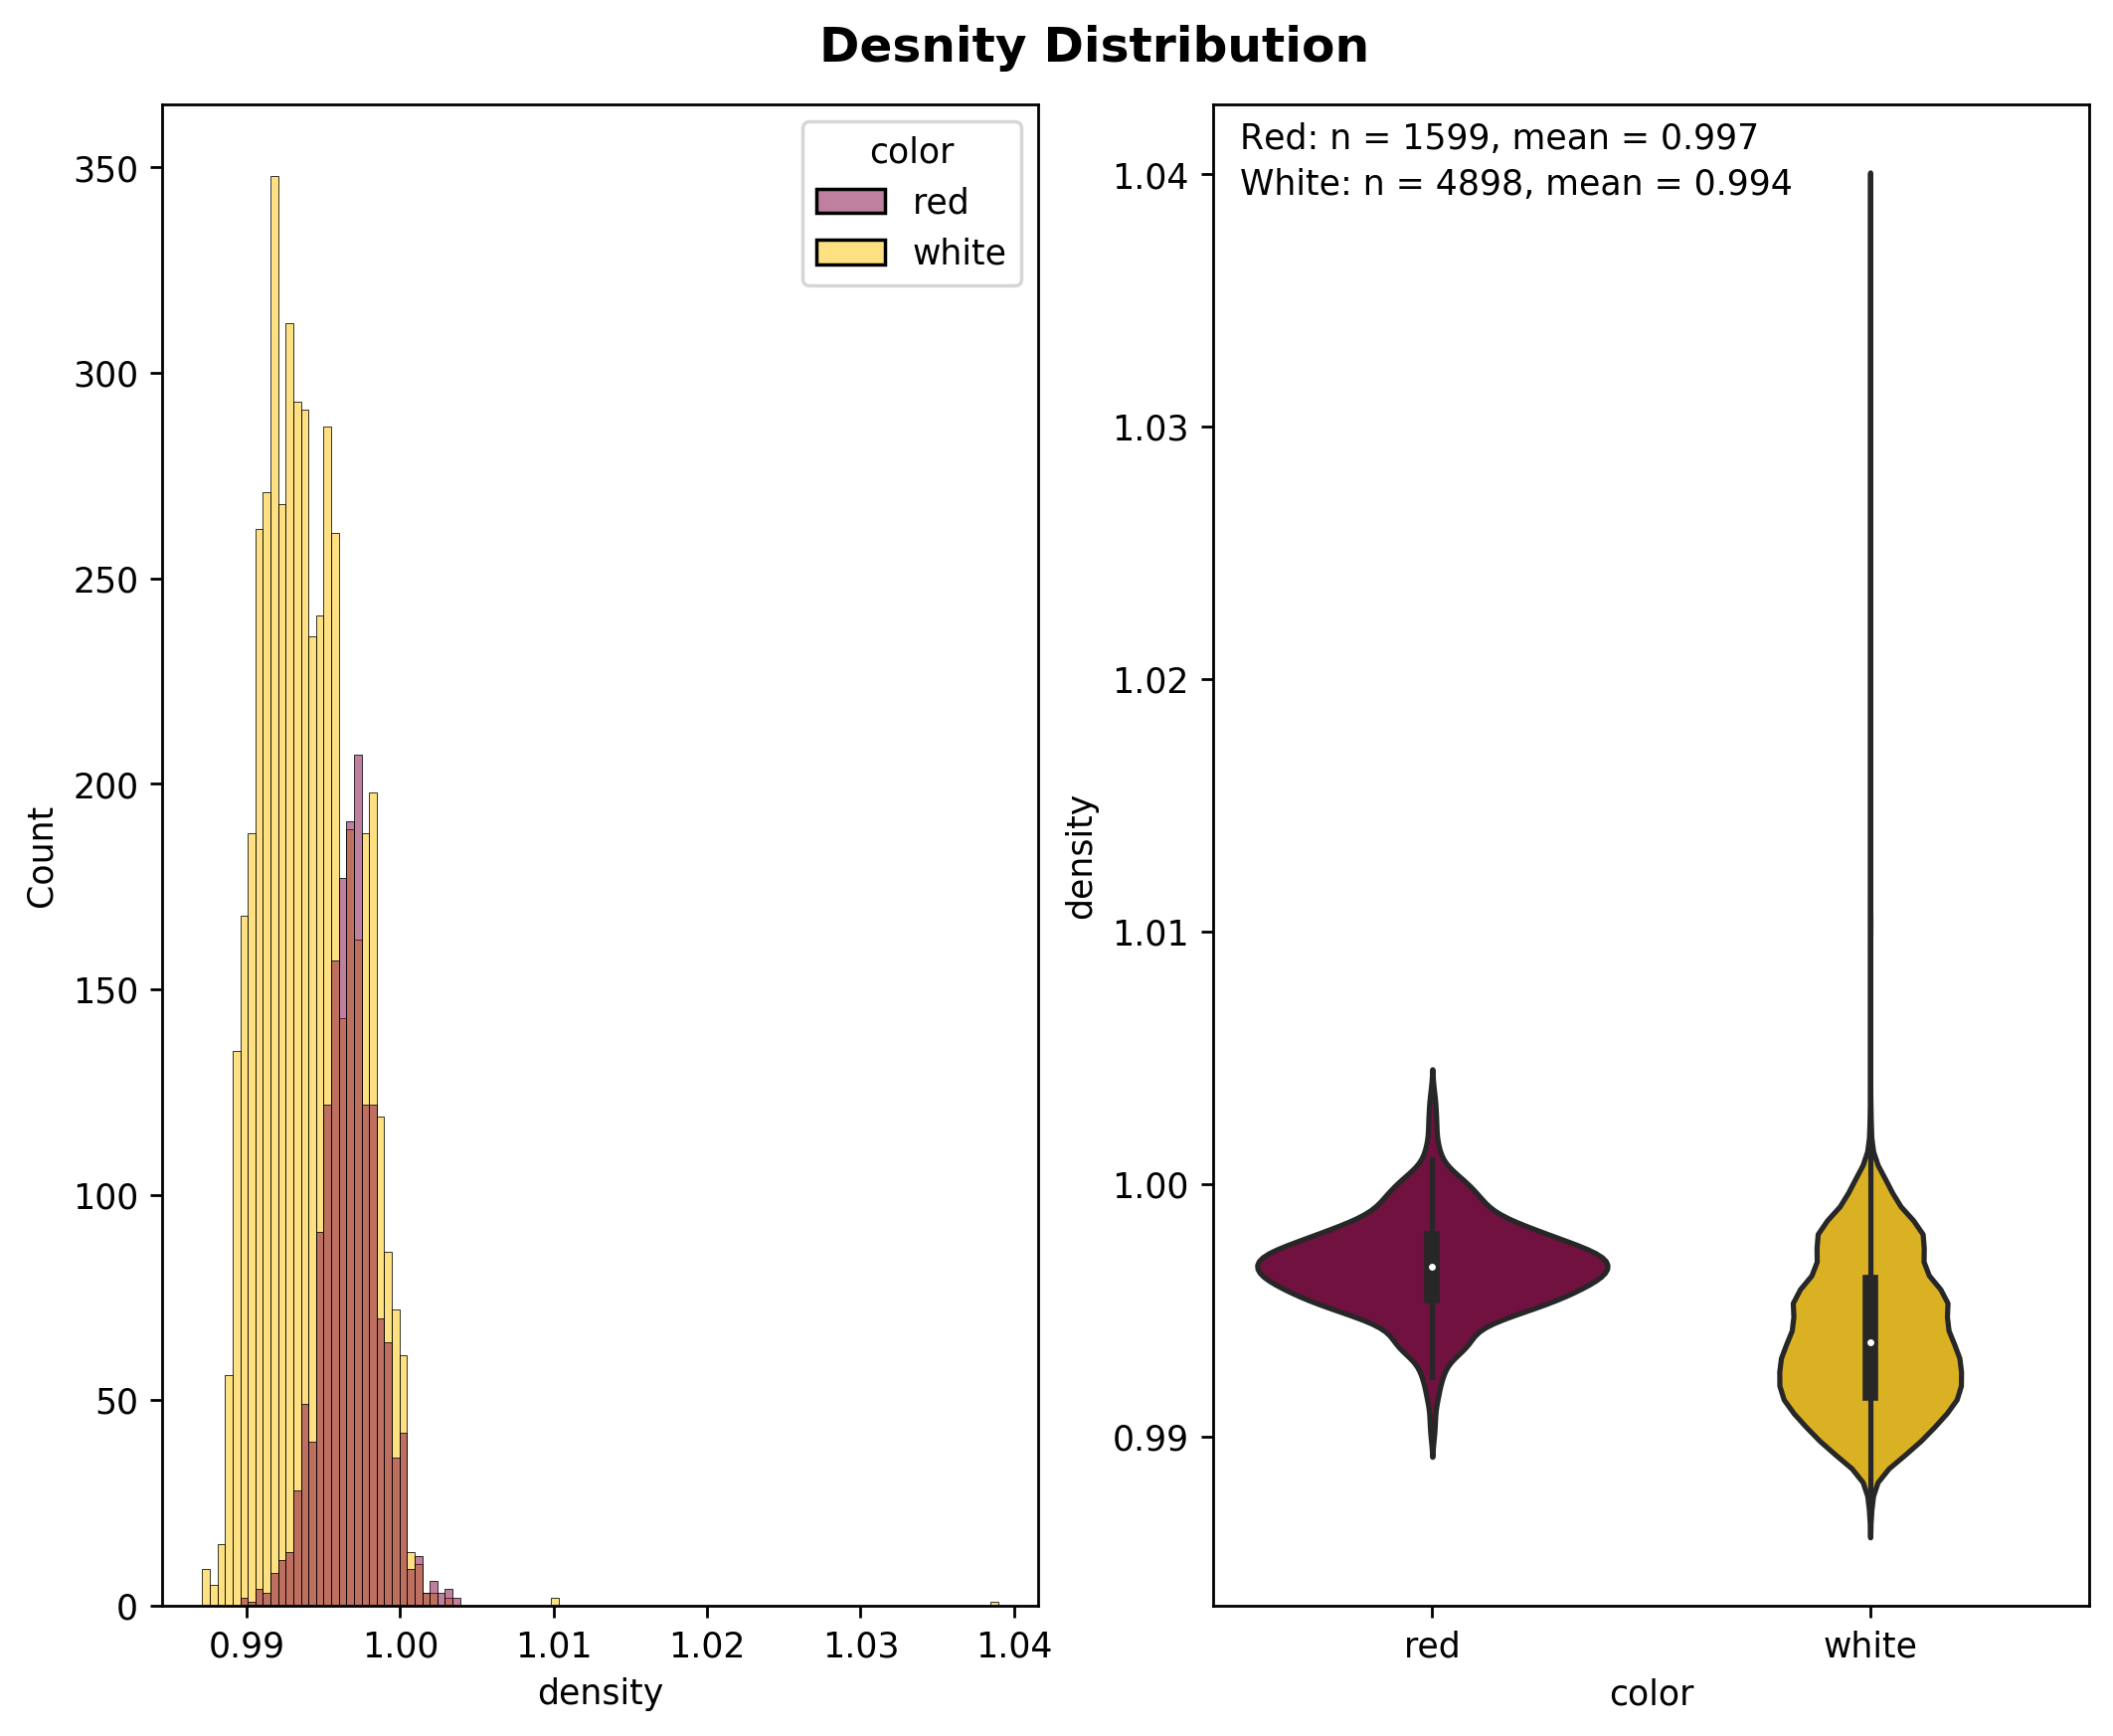

In [50]:
## 7. Density ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Desnity Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="density", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="density",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['density'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['density'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('density_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('density_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

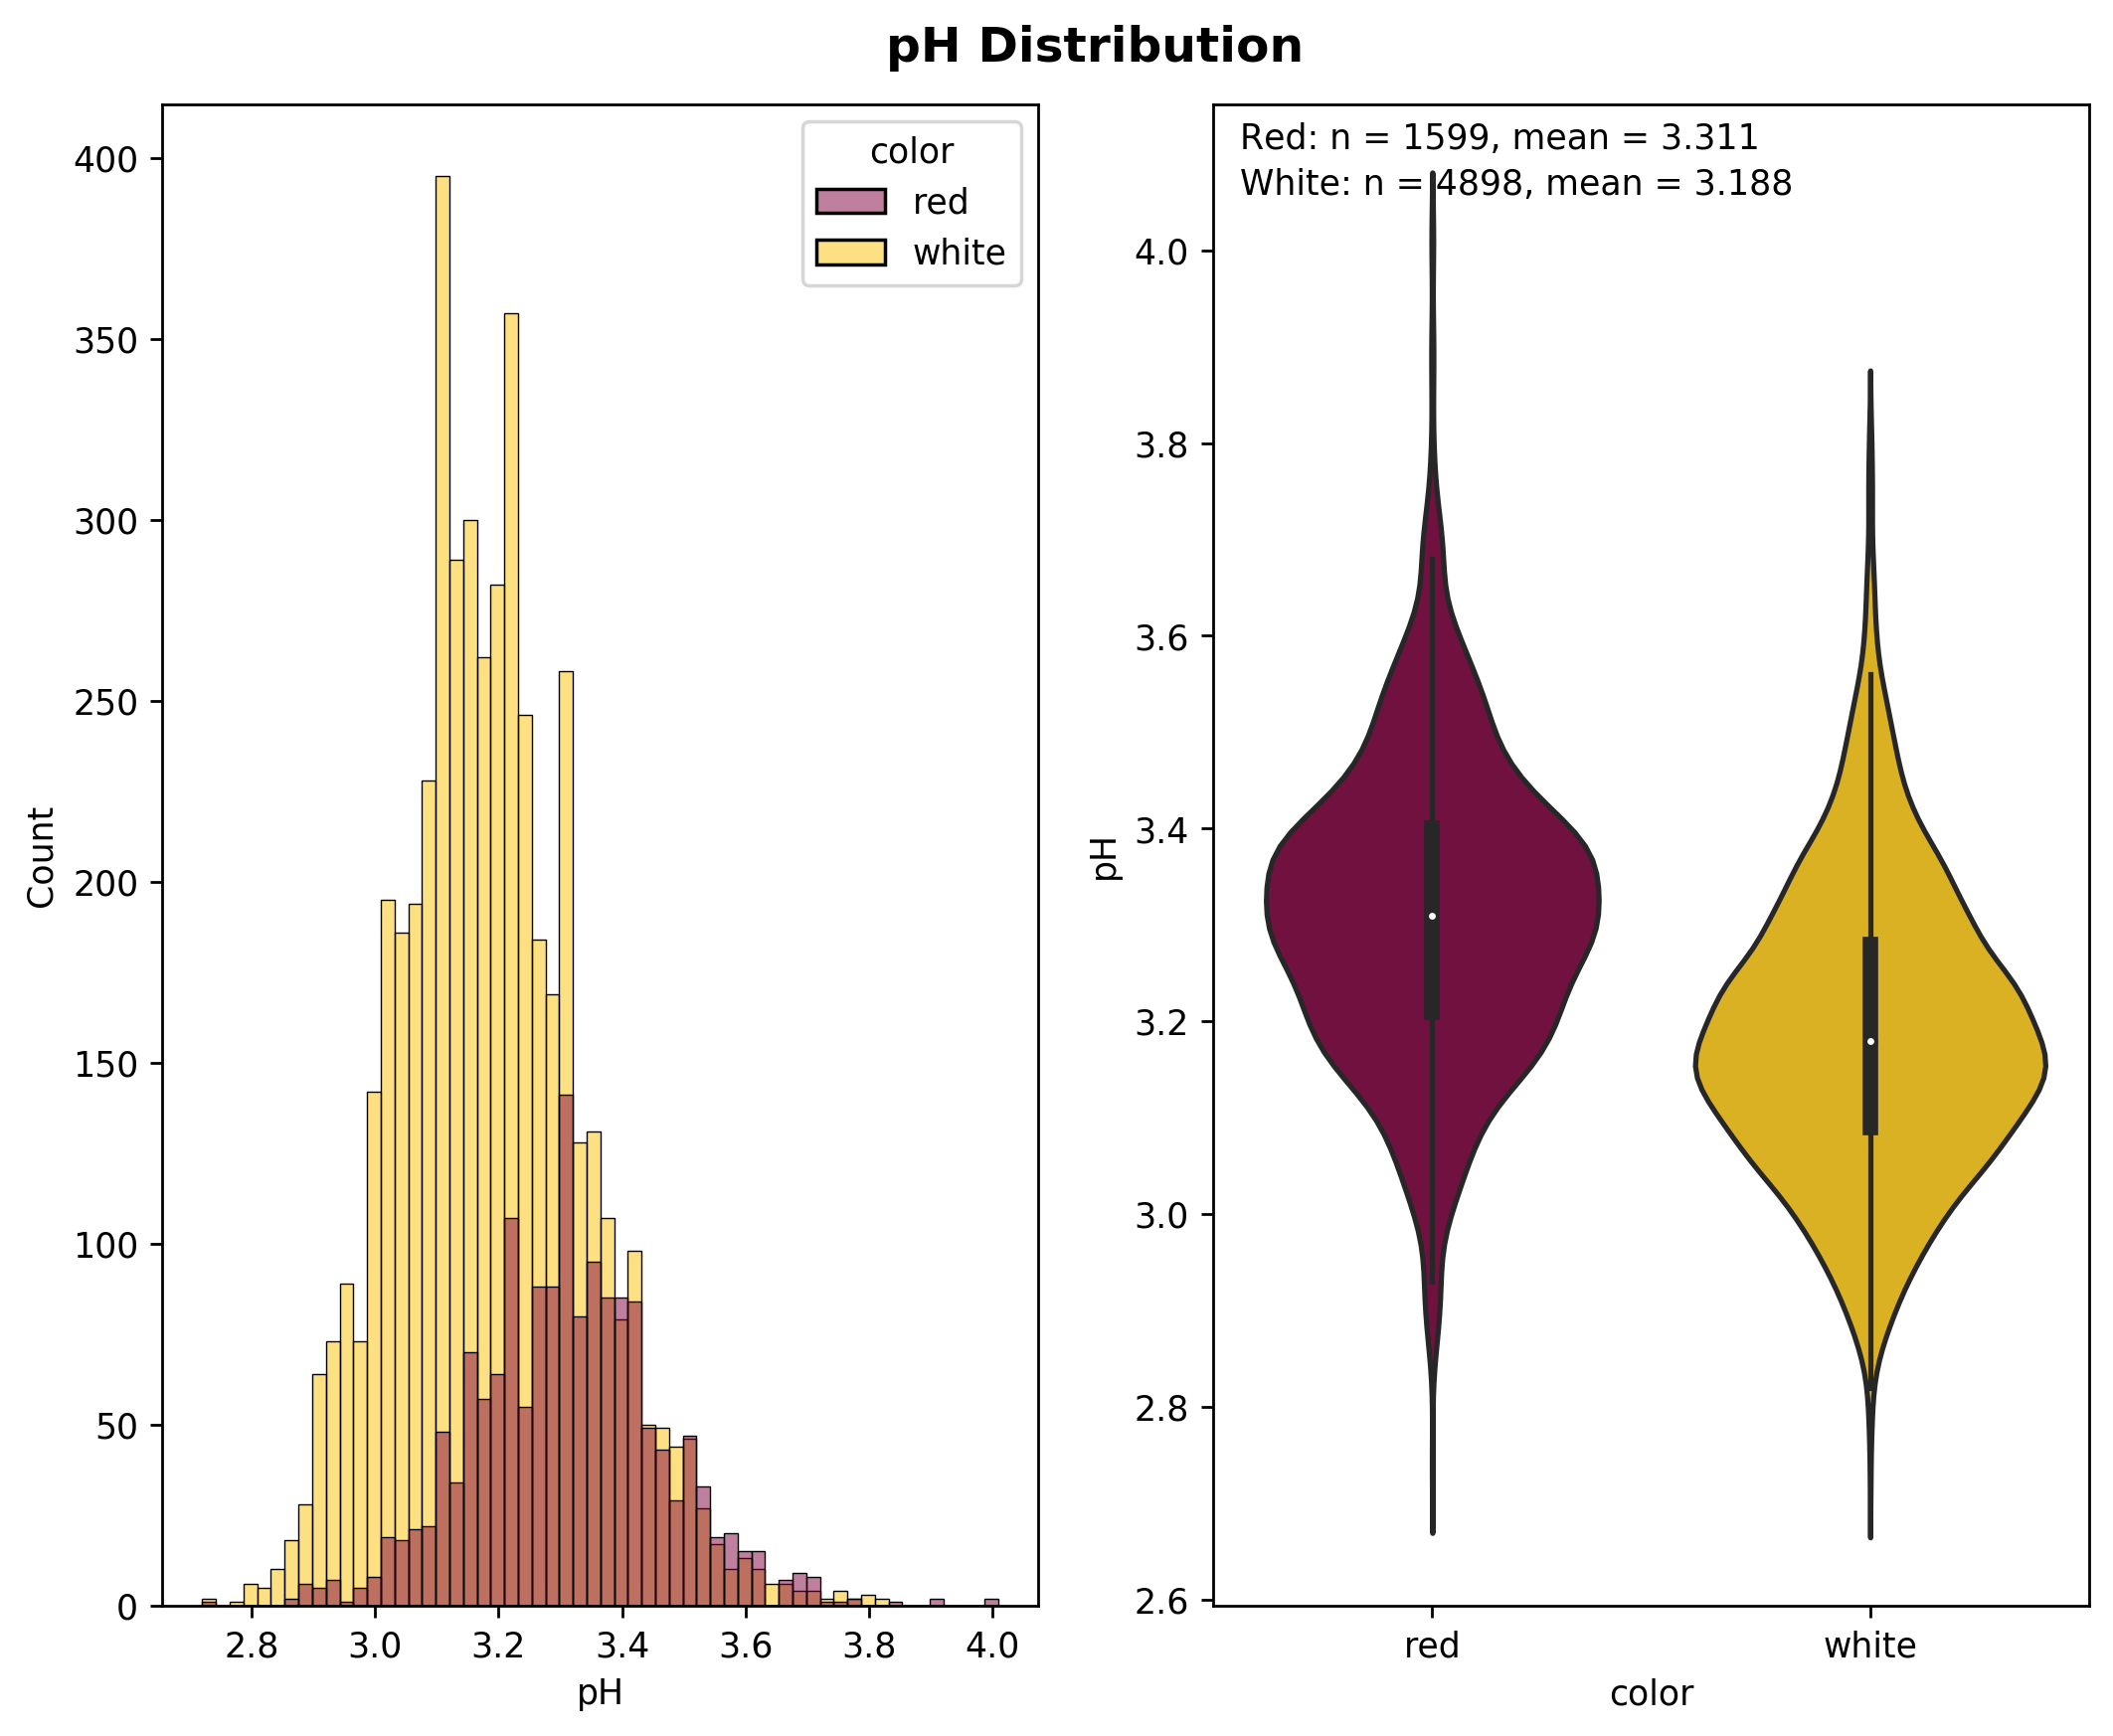

In [51]:
## 7. pH ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('pH Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="pH", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="pH",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['pH'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['pH'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('pH_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('pH_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

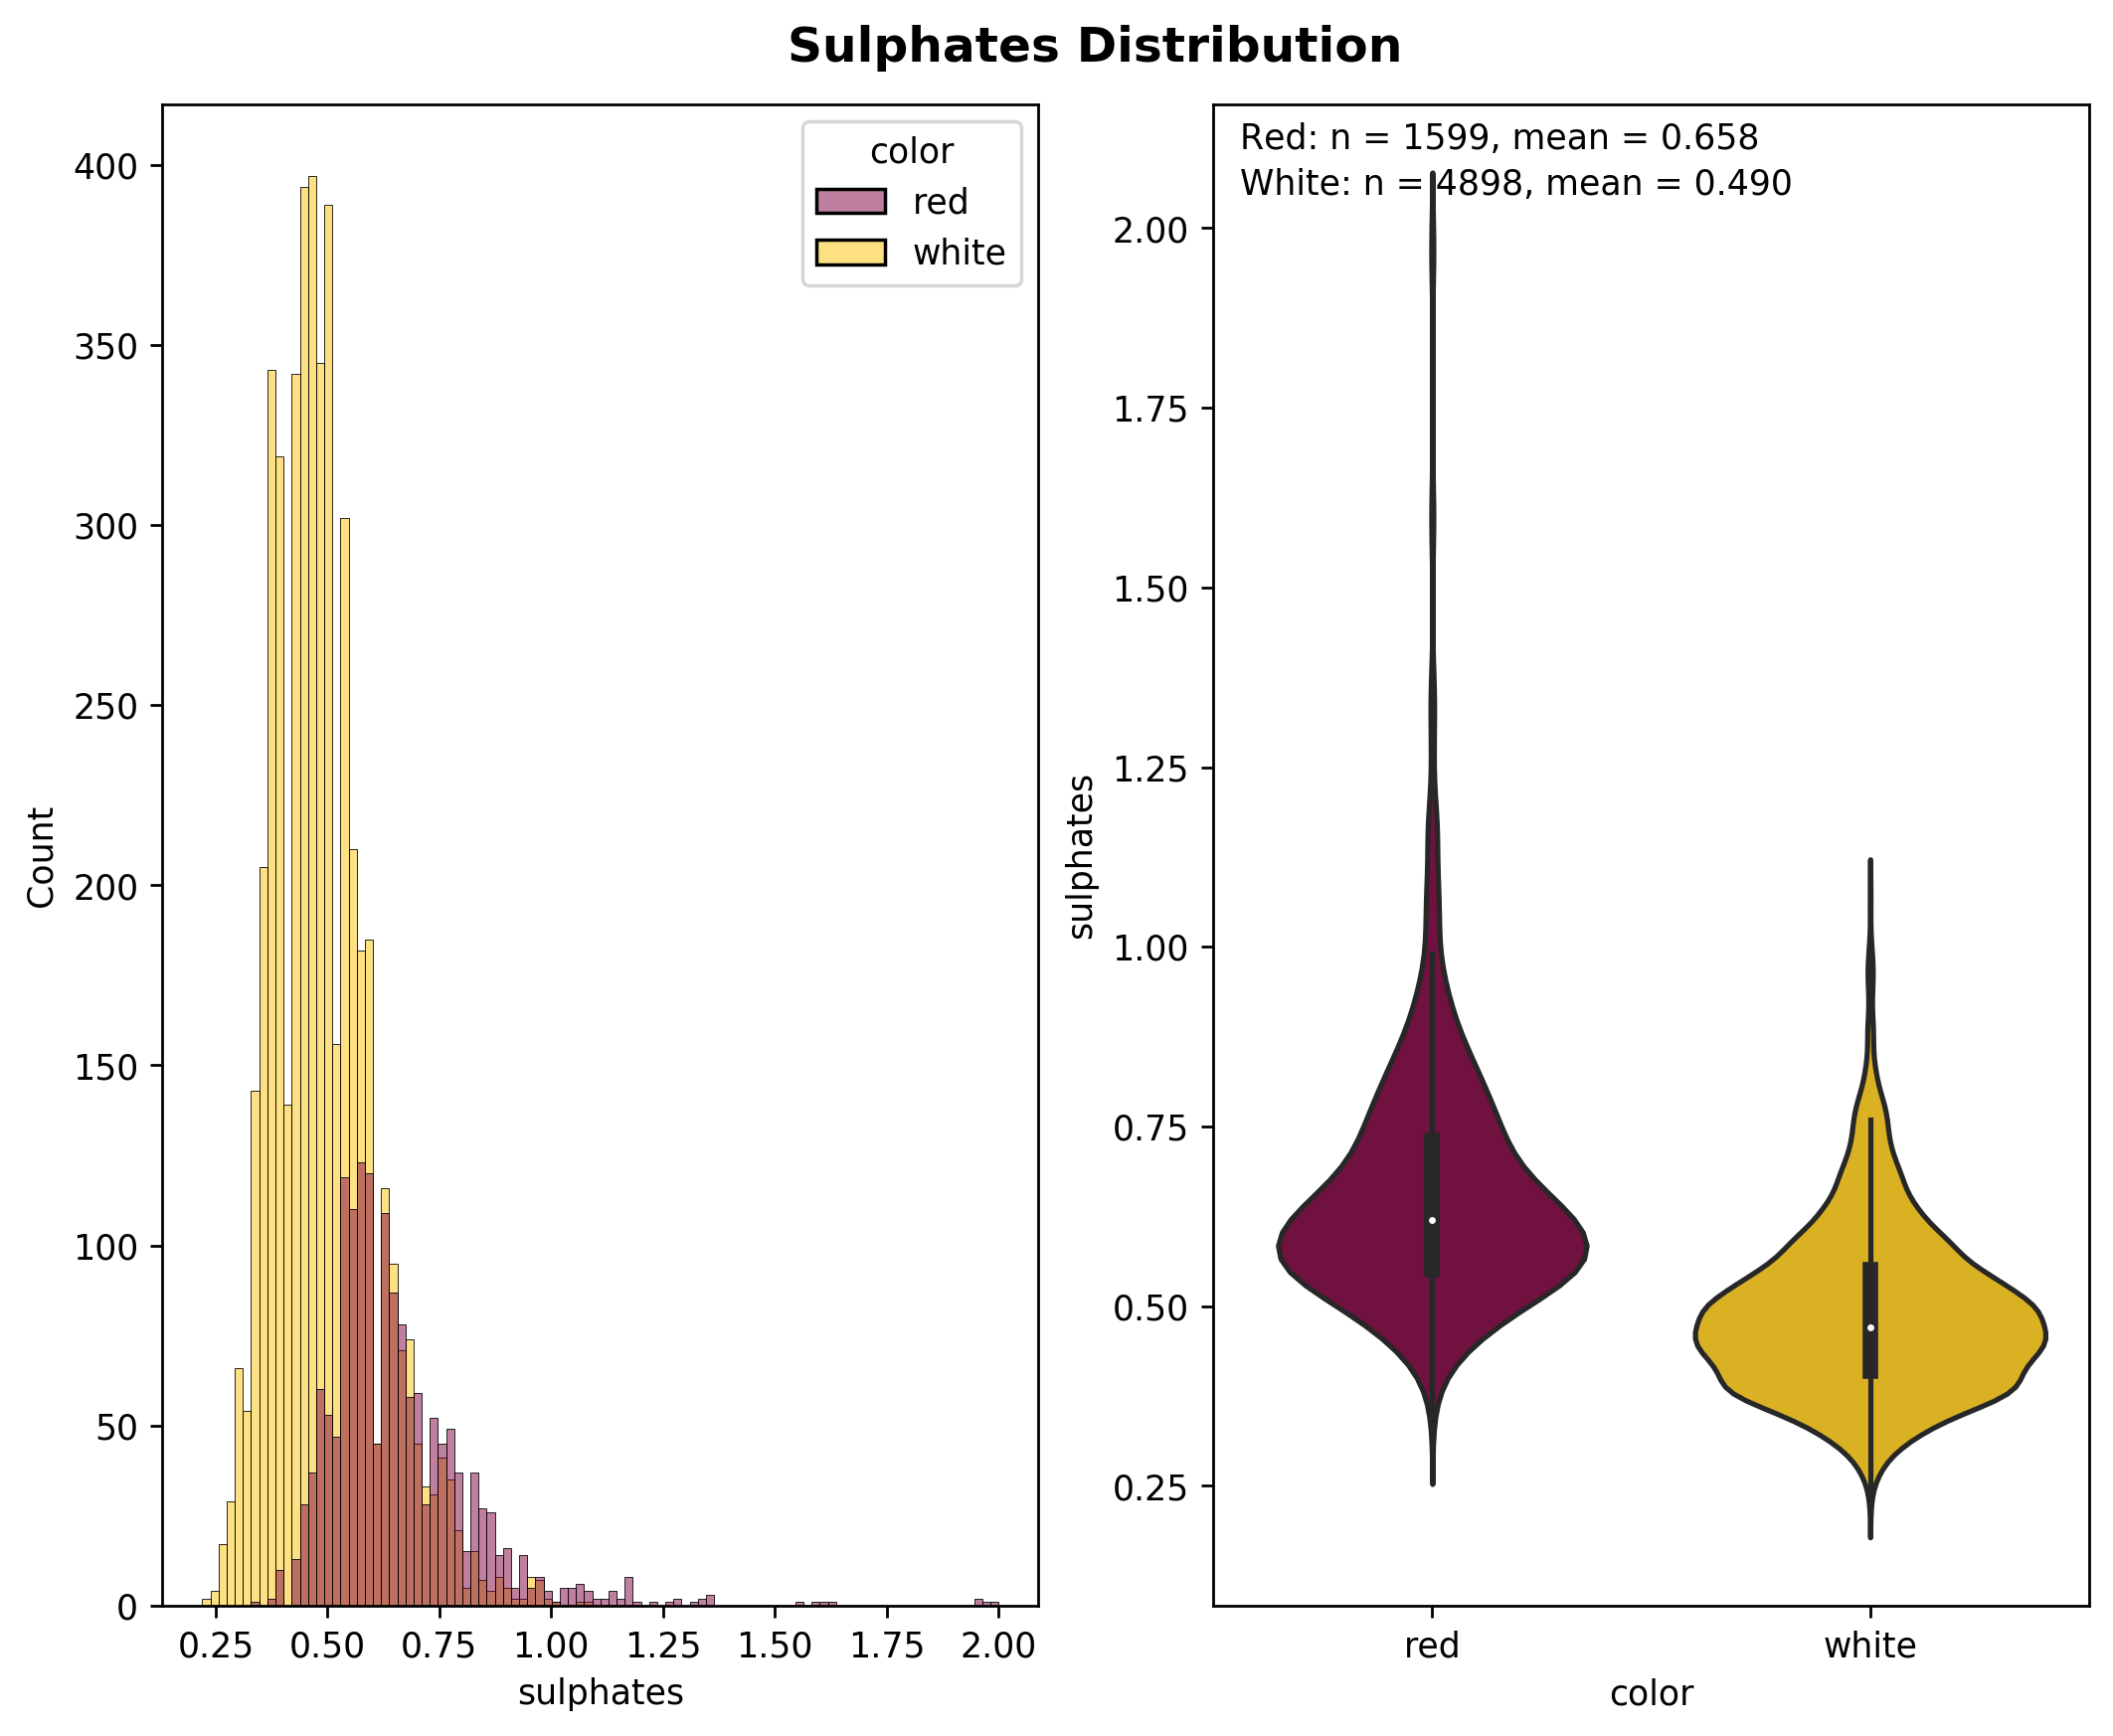

In [52]:
## 8. Sulphates ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Sulphates Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="sulphates", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="sulphates",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['sulphates'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['sulphates'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('sulphates_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('sulphates_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

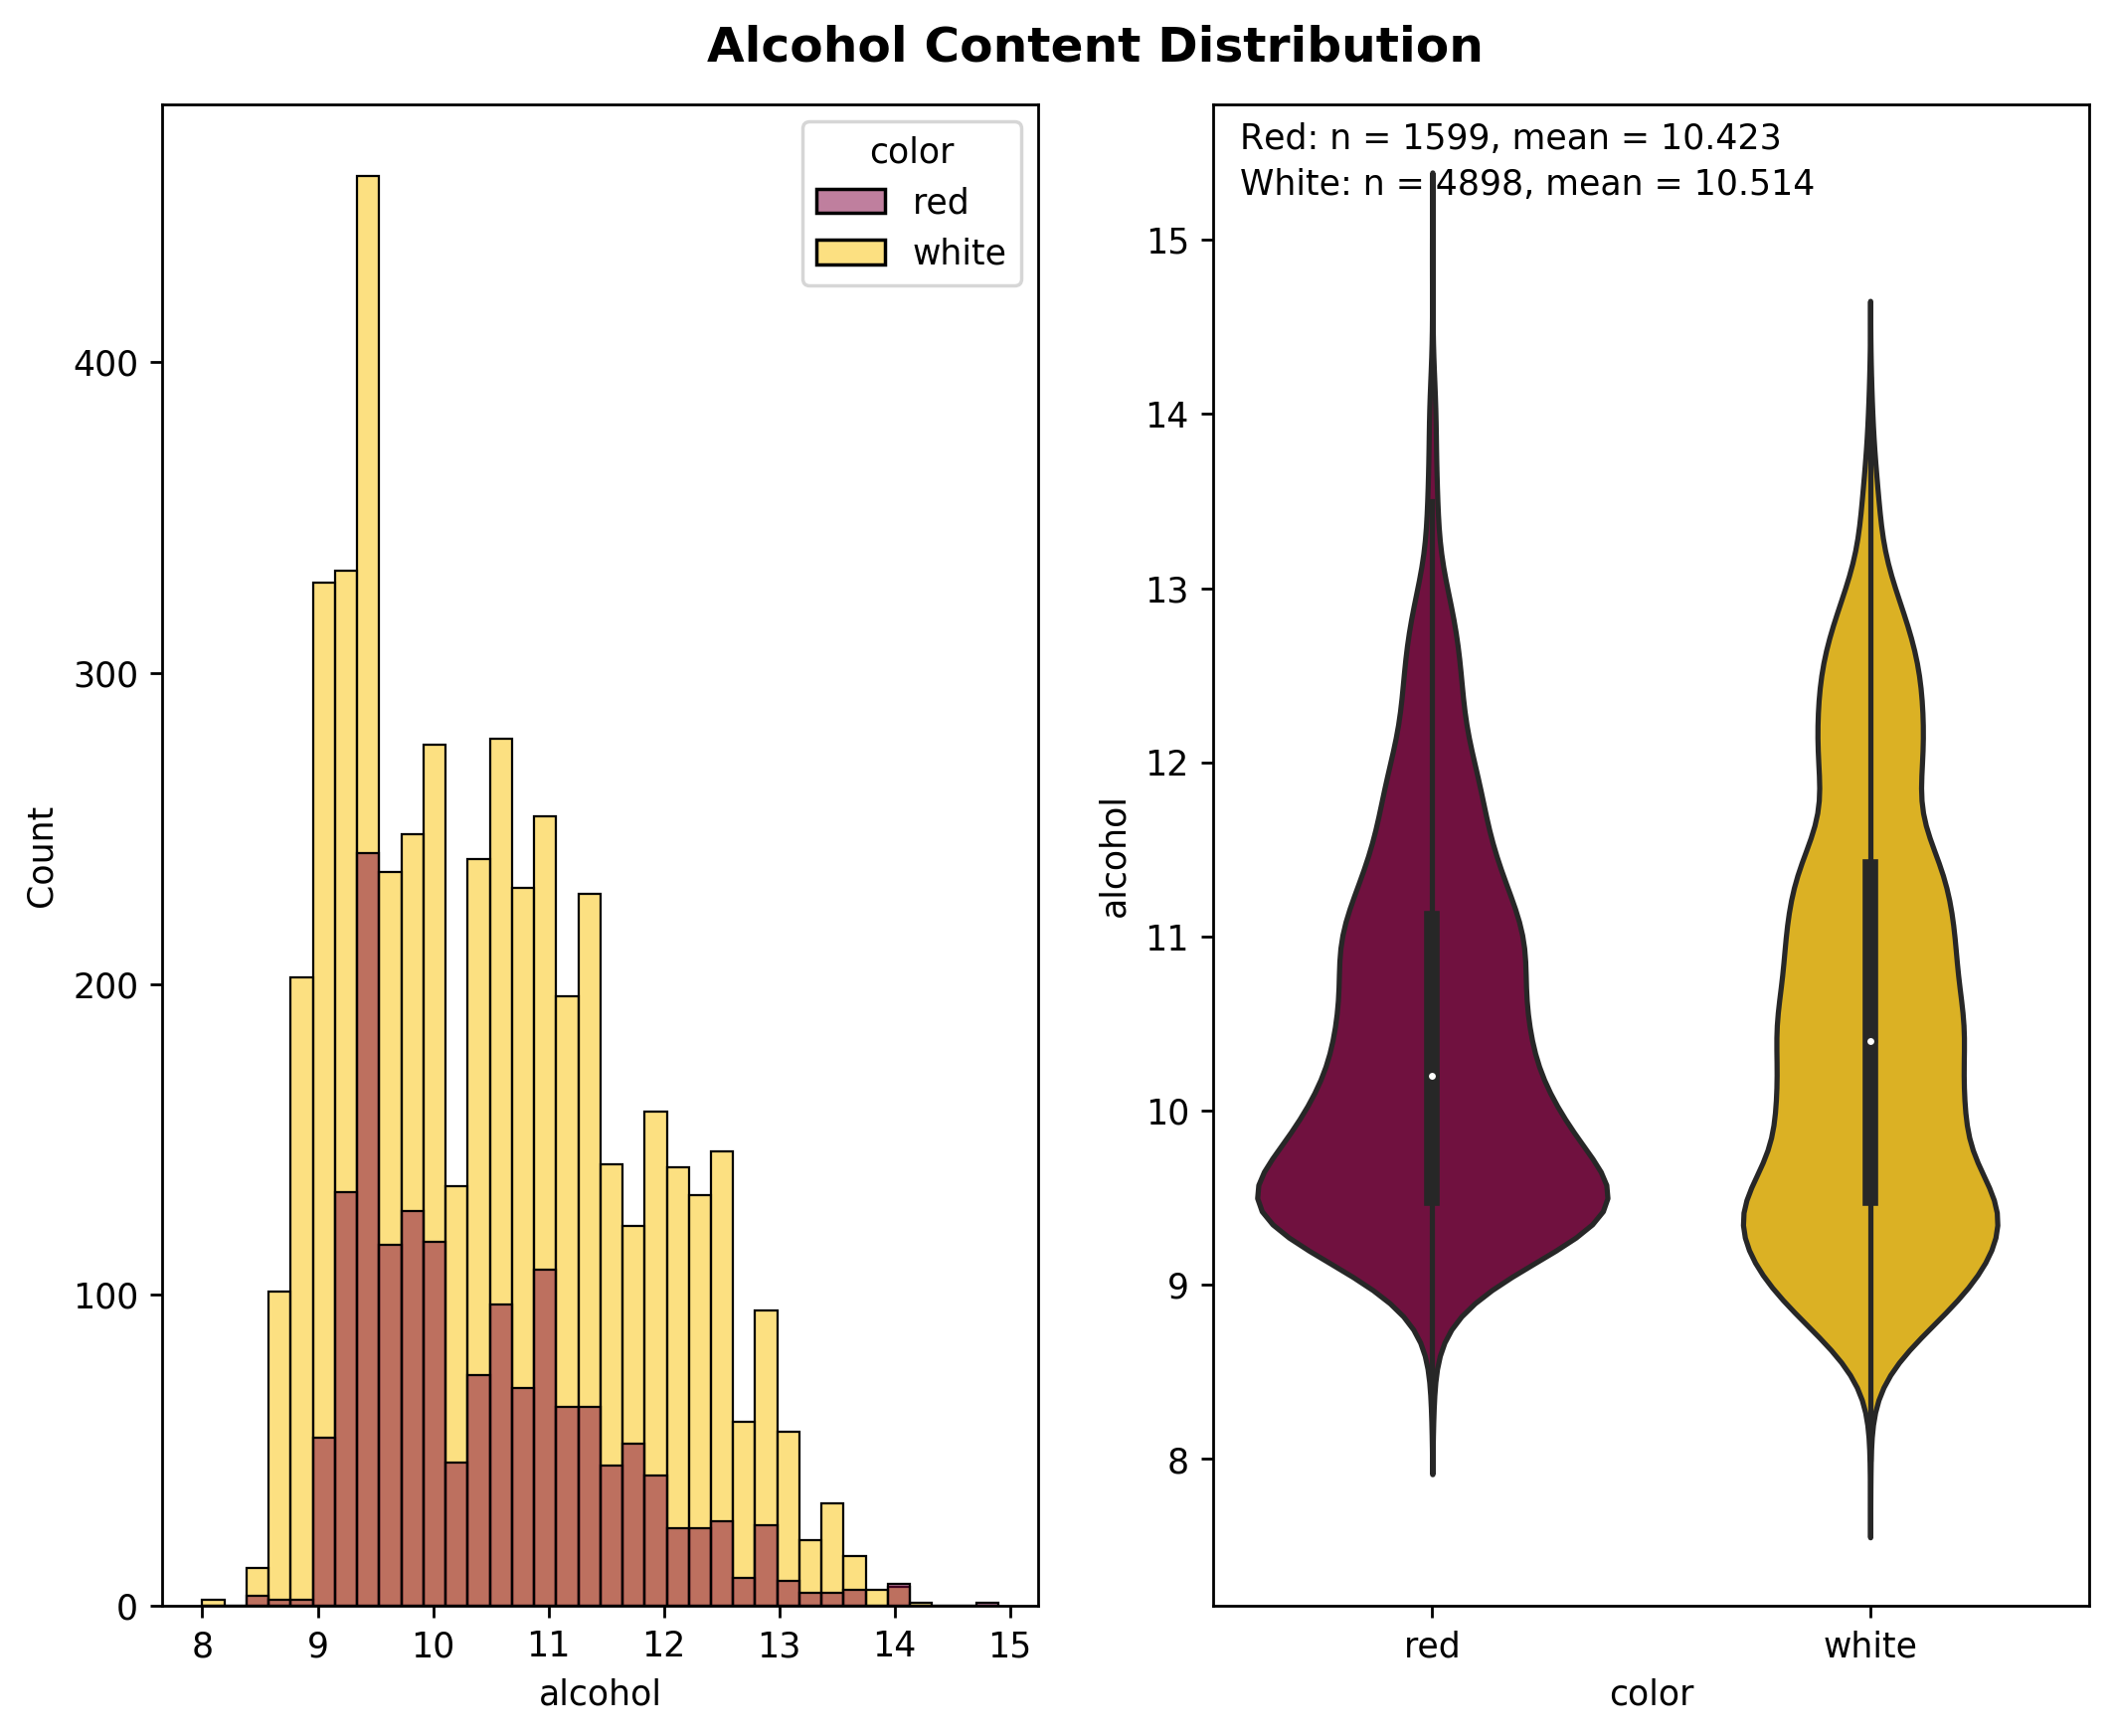

In [53]:
## 9. Alcohol ##

fig, ax = plt.subplots(nrows=1,ncols=2, 
                       sharex=False, 
                       sharey=False,figsize = (10,8),
                      )
fig.suptitle('Alcohol Content Distribution', fontsize = 14, fontweight = 'bold', ha='center', y=0.92)

# histogram
sns.histplot(data=fulldf, 
             x="alcohol", 
             hue="color",
             palette = colordict,
             ax=ax[0],
            )

# violinplots
sns.violinplot(data=fulldf,
           x="color",
           y="alcohol",
           palette=colordict,
           ax=ax[1],
           )

# annotations
plt.annotate(f"Red: n = {len(reddf.index.values)}, mean = {reddf['alcohol'].mean(axis=0):.3f}",
             xy = (0.03,0.97), xycoords='axes fraction')
plt.annotate(f"White: n = {len(whitedf.index.values)}, mean = {whitedf['alcohol'].mean(axis=0):.3f}",
             xy = (0.03,0.94), xycoords='axes fraction')

# figure export
#plt.savefig('alcohol_distribution.png', bbox_inches='tight', orientation='landscape')
#plt.savefig('alcohol_distribution.pdf', bbox_inches='tight', orientation='landscape')
plt.show()
plt.close()

In [56]:
# export to pdf

import PyPDF4

# Open the files that have to be merged one by one
alcohol = open('alcohol_distribution.pdf', 'rb')
chlorides = open('chlorides_distribution.pdf', 'rb')
citric_acid = open('citric_acid_distribution.pdf', 'rb')
density = open('density_distribution.pdf', 'rb')
fixed_acidity = open('fixed_acidity_distribution.pdf', 'rb')
free_sulfur_dioxide = open('free_sulfur_dioxide_distribution.pdf', 'rb')
pH = open('pH_distribution.pdf', 'rb')
quality = open('quality_distribution.pdf', 'rb')
residual_sugar = open('residual_sugar_distribution.pdf', 'rb')
sulphates = open('sulphates_distribution.pdf', 'rb')
total_sulfur_dioxide = open('total_sulfur_dioxide_distribution.pdf', 'rb')
volatile_acidity = open('volatile_acidity_distribution.pdf', 'rb')
 
# Read the files that you have opened
alcoholFileReader = PyPDF4.PdfFileReader(alcohol)
chloridesFileReader = PyPDF4.PdfFileReader(chlorides)
citric_acidFileReader = PyPDF4.PdfFileReader(citric_acid)
densityFileReader = PyPDF4.PdfFileReader(density)
fixed_acidityFileReader = PyPDF4.PdfFileReader(fixed_acidity)
free_sulfur_dioxideFileReader = PyPDF4.PdfFileReader(free_sulfur_dioxide)
pHFileReader = PyPDF4.PdfFileReader(pH)
qualityFileReader = PyPDF4.PdfFileReader(quality)
residual_sugarFileReader = PyPDF4.PdfFileReader(residual_sugar)
sulphatesFileReader = PyPDF4.PdfFileReader(sulphates)
total_sulfur_dioxideFileReader = PyPDF4.PdfFileReader(total_sulfur_dioxide)
volatile_acidityFileReader = PyPDF4.PdfFileReader(volatile_acidity)
 
# Create a new PdfFileWriter object which represents a blank PDF document
pdfWriter = PyPDF4.PdfFileWriter()

filereaderlist = [alcoholFileReader, chloridesFileReader, citric_acidFileReader, densityFileReader, 
                  fixed_acidityFileReader, free_sulfur_dioxideFileReader, pHFileReader, qualityFileReader, 
                  residual_sugarFileReader, sulphatesFileReader, total_sulfur_dioxideFileReader, volatile_acidityFileReader]

# read every page in
for file in filereaderlist: # would add for loop here # for pagenum in range(speciesFileReader.pageNum)
    pageObj = file.getPage(0) # each is only 1 page # getPage(pagenum)
    pdfWriter.addPage(pageObj)

# Now that you have copied all the pages in the documents, write them into the a new document
pdfOutputFile = open('exploratory_stats.pdf', 'wb')
pdfWriter.write(pdfOutputFile)
 
# Close all the files - Created as well as opened
pdfOutputFile.close()
alcohol.close()
chlorides.close()
citric_acid.close()
density.close()
fixed_acidity.close()
free_sulfur_dioxide.close()
pH.close()
quality.close()
residual_sugar.close()
sulphates.close()
total_sulfur_dioxide.close()
volatile_acidity.close()